# Project 2: Exploratory Data Analysis (EDA)


Fiona Dee - May 2021

NOTE:  
**Black headlines** are information, instructions or other text provided with the project.  
<span style="color:purple">**Purple headlines** are my commentary</span>  
  
---
---

### Background Information about the project

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
# plt.style.use('bmh')

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'



<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
path_to_file = './datasets-p2/sat_scores.csv'

# read file to list of rows
with open(path_to_file) as f:
    rows = [row for row in csv.reader(f)]
    
    # split into header and data
    header = rows[0]
    data = rows[1:]

print('column names:', header)
print('number of data rows:', len(data))
data[:5]   # show first 5 rows of data

column names: ['State', 'Rate', 'Verbal', 'Math']
number of data rows: 52


[['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505'],
 ['NH', '72', '520', '516']]

In [3]:
# change numbers in the data from strings to floats
for i in range(len(data)):
    for j in range(len(data[i])):
        try:
            data[i][j] = float(data[i][j])
        except:
            pass
        
data[:5]   # show first 5 rows of data

[['CT', 82.0, 509.0, 510.0],
 ['NJ', 81.0, 499.0, 513.0],
 ['MA', 79.0, 511.0, 515.0],
 ['NY', 77.0, 495.0, 505.0],
 ['NH', 72.0, 520.0, 516.0]]

In [4]:
# initialise & add to dictionary
sat_scores_dict = dict()

for key in range(len(header)):
    sat_scores_dict[header[key]] = [data[i][key] for i in range(len(data))]

print('number of rows:', len(sat_scores_dict[header[0]]))
sat_scores_dict  # confirmed to match number of data rows

number of rows: 52


{'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',
  'GA',
  'IN',
  'SC',
  'DC',
  'OR',
  'FL',
  'WA',
  'TX',
  'HI',
  'AK',
  'CA',
  'AZ',
  'NV',
  'CO',
  'OH',
  'MT',
  'WV',
  'ID',
  'TN',
  'NM',
  'IL',
  'KY',
  'WY',
  'MI',
  'MN',
  'KS',
  'AL',
  'NE',
  'OK',
  'MO',
  'LA',
  'WI',
  'AR',
  'UT',
  'IA',
  'SD',
  'ND',
  'MS',
  'All'],
 'Rate': [82.0,
  81.0,
  79.0,
  77.0,
  72.0,
  71.0,
  71.0,
  69.0,
  69.0,
  68.0,
  67.0,
  65.0,
  65.0,
  63.0,
  60.0,
  57.0,
  56.0,
  55.0,
  54.0,
  53.0,
  53.0,
  52.0,
  51.0,
  51.0,
  34.0,
  33.0,
  31.0,
  26.0,
  23.0,
  18.0,
  17.0,
  13.0,
  13.0,
  12.0,
  12.0,
  11.0,
  11.0,
  9.0,
  9.0,
  9.0,
  8.0,
  8.0,
  8.0,
  7.0,
  6.0,
  6.0,
  5.0,
  5.0,
  4.0,
  4.0,
  4.0,
  45.0],
 'Verbal': [509.0,
  499.0,
  511.0,
  495.0,
  520.0,
  501.0,
  500.0,
  511.0,
  506.0,
  510.0,
  501.0,
  508.0,
  493.0,
  491.0,
  499.0,
  486.0,
  482.0,

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

In [5]:
# convert dictionary to DataFrame
sat_scores_dict_df = pd.DataFrame(sat_scores_dict)
print(sat_scores_dict_df.shape)
sat_scores_dict_df.dtypes

(52, 4)


State      object
Rate      float64
Verbal    float64
Math      float64
dtype: object

In [6]:
# pandas .read_csv() directly to DataFrame
sat_scores_readCSV_df = pd.read_csv(path_to_file)
print(sat_scores_readCSV_df.shape)
sat_scores_readCSV_df.dtypes

(52, 4)


State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

## <span style="color:purple"> _Comments about .dtypes difference between these DataFrames_</span>  

_Q: Compare the DataFrames using the .dtypes attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?_  

- Loading from file defaults to text (str) being read in. If not converted to a numerical type before being made into a DataFrame, then the DataFrame will have all object types.
- Pandas .read_csv() tries to infer data types from the columns. This saves  time otherwise spent in converting variables which are all numerical. It also identifies variables which initially appear to be numerical but have random variables somewhere.


### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [7]:
# use DataFrame from .read_csv() function
sat_scores_df = sat_scores_readCSV_df

sat_scores_df.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


## <span style="color:purple"> _What does this data describe?_</span>  

It lists scores of the SAT (Scholastic Assessment Test), the college admission test used in the USA.  

- State: USA State
- Rate: percentage of high school students in the state which completed a SAT.
- Verbal: average score for the State, for the students who participated.
- Math: average score for the State, for the students who participated.

*Note:* each section (Math/Verbal) is scored on a scale of 200-800.

In [8]:
# now check the last few rows
sat_scores_df.tail()

,State,Rate,Verbal,Math
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


In [9]:
# last row has State = 'All' - drop aggregation row so DataFrame only has data
sat_scores_df = sat_scores_df.drop(index=51)
sat_scores_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   51 non-null     object
 1   Rate    51 non-null     int64 
 2   Verbal  51 non-null     int64 
 3   Math    51 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.0+ KB


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [10]:
# initialise dictionary & add info which can be automated
data_dict = dict()
for key in sat_scores_df.keys():
    data_dict[key] = {'description':'...', 'type':sat_scores_df[key].dtype}

# add text descriptions
descriptions_dict= {'State': 'State id.', 
                    'Rate': 'Percent of students that took SAT.',
                    'Verbal': 'Average verbal scores on SAT.',
                    'Math': 'Average math scores on SAT.',
                    'Another Column': 'should not end up in final dict or cause an error'}

# update data_dictionary with text descriptions
for key in descriptions_dict.keys():
    if key in data_dict.keys():              # only update if key in both dictionaries
        data_dict[key]['description'] = descriptions_dict[key]

## sample output
#         {'Math': {'description': 'Average math scores on SAT.', 'type': dtype('int64')},
#          'Rate': {'description': 'Percent of students that took SAT.',
#                   'type': dtype('int64')},
#          'State': {'description': 'State id.', 'type': dtype('O')},
#          'Verbal': {'description': 'Average verbal scores on SAT.',
#                     'type': dtype('int64')},
#          'dataset_shape': (51, 4)}
data_dict

{'State': {'description': 'State id.', 'type': dtype('O')},
 'Rate': {'description': 'Percent of students that took SAT.',
  'type': dtype('int64')},
 'Verbal': {'description': 'Average verbal scores on SAT.',
  'type': dtype('int64')},
 'Math': {'description': 'Average math scores on SAT.',
  'type': dtype('int64')}}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [11]:
# ## import statements and style setting at start of notebook

# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.set_style('whitegrid')

# %config InlineBackend.figure_format = 'retina'
# %matplotlib inline

# plt.style.use('fivethirtyeight')
# plt.style.use('ggplot')


# to remove the future warnings about .distplot depreciation
import warnings
warnings.filterwarnings('ignore')

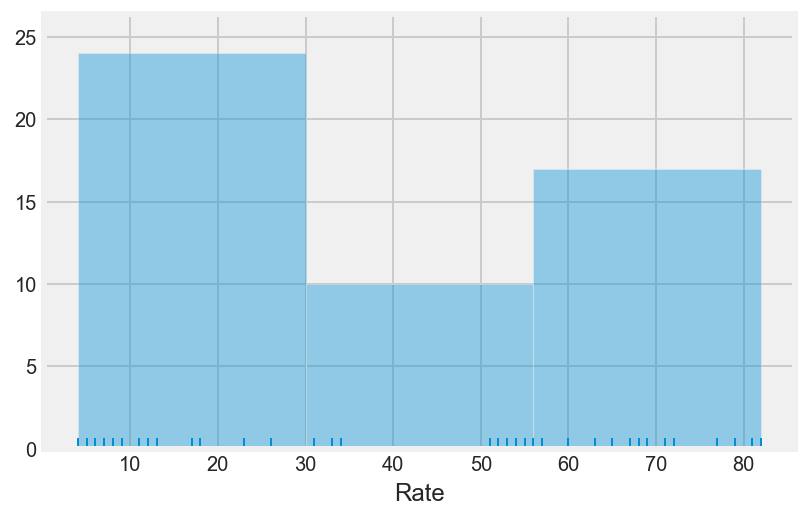

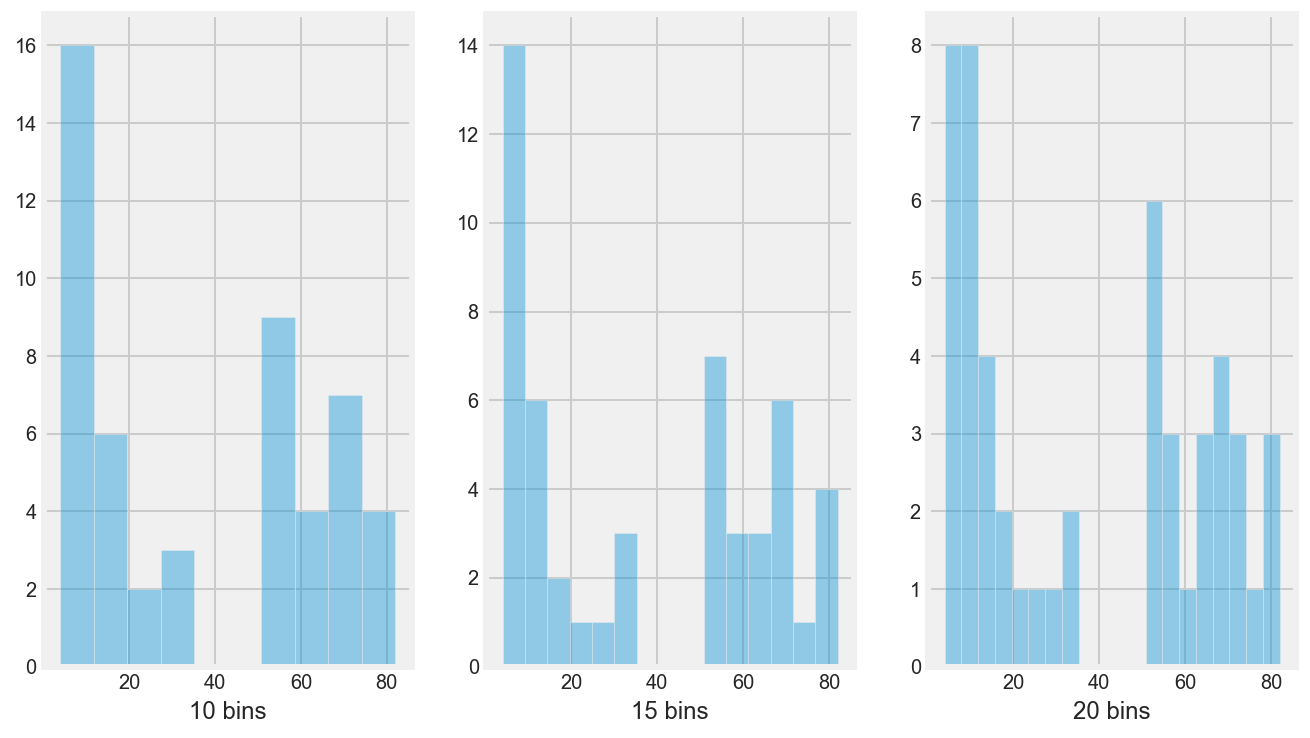

In [12]:
# plot the distributions for Rate
sns.distplot(sat_scores_df.Rate, kde=False, rug=True)

fig, ax = plt.subplots(1,3, figsize = (10,6))

sns.distplot(sat_scores_df.Rate, kde=False, ax = ax[0], bins=10, axlabel='10 bins')
sns.distplot(sat_scores_df.Rate, kde=False, ax = ax[1], bins=15, axlabel='15 bins')
sns.distplot(sat_scores_df.Rate, kde=False, ax = ax[2], bins=20, axlabel='20 bins');

# recommend to use bins=15 for this variable as it shows good detail

## Observation:
## There is a clear grouping of states that have over 50% participation,
## and a large number of states with under 10% participation.

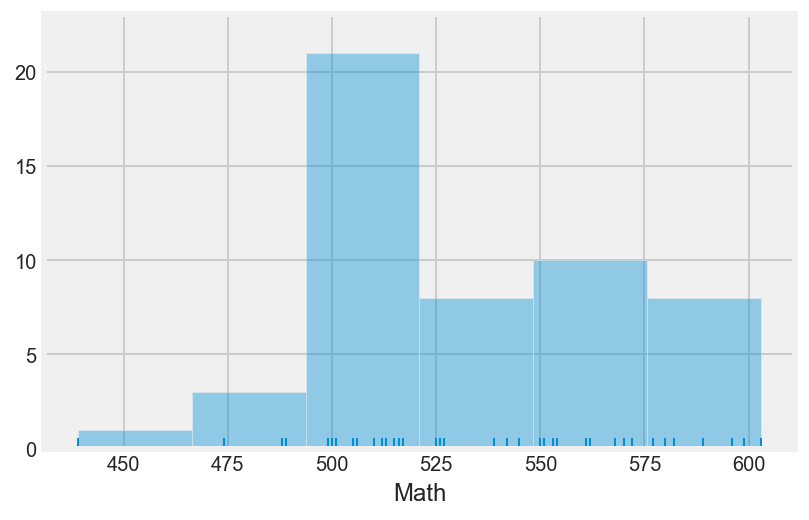

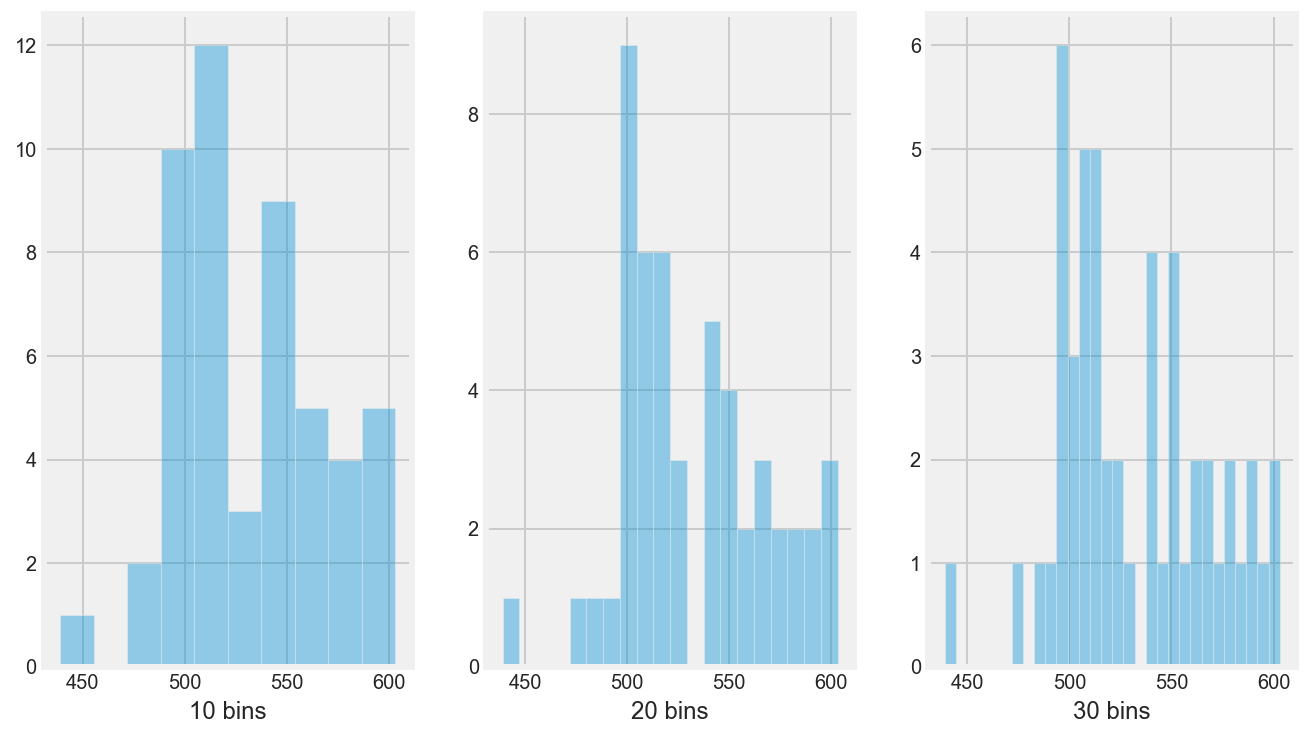

In [13]:
# plot the distributions for Math
sns.distplot(sat_scores_df.Math, kde=False, rug=True)

fig, ax = plt.subplots(1,3, figsize = (10,6))

sns.distplot(sat_scores_df.Math, kde=False, ax = ax[0], bins=10, axlabel='10 bins')
sns.distplot(sat_scores_df.Math, kde=False, ax = ax[1], bins=20, axlabel='20 bins')
sns.distplot(sat_scores_df.Math, kde=False, ax = ax[2], bins=30, axlabel='30 bins');

# recommend to use bins=20 for this variable as it shows good detail

## Observation:
## The vast majority of states have average Math scores over 500, 
## grouping between 500 & 550.
## There is an outlier below 450.

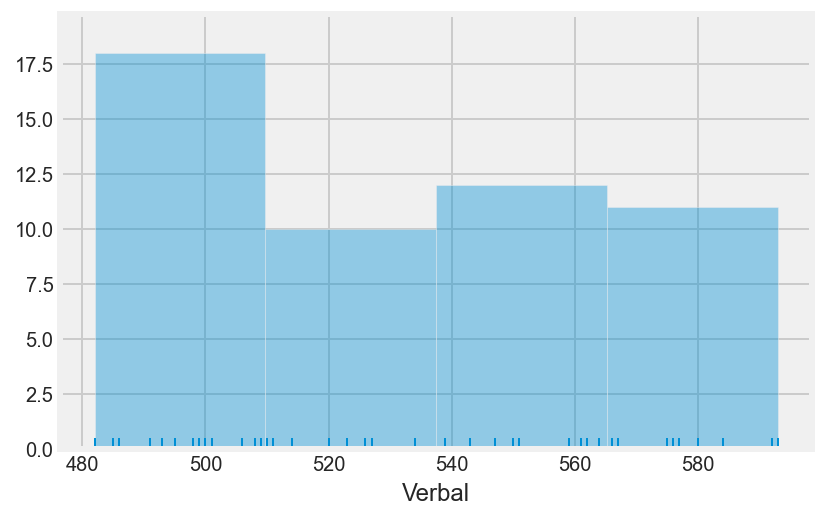

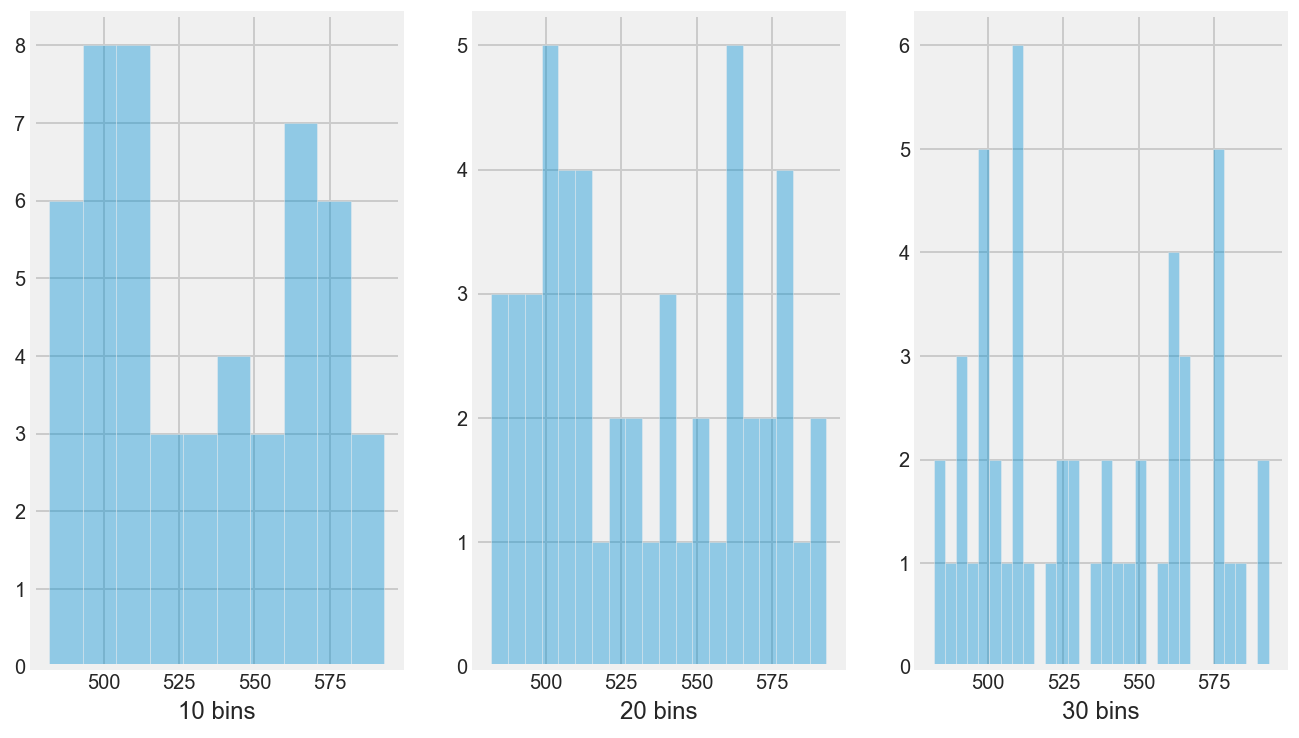

In [14]:
# plot the distributions for Verbal
sns.distplot(sat_scores_df.Verbal, kde=False, rug=True)

# compare bin sizes
fig, ax = plt.subplots(1,3, figsize = (10,6))

sns.distplot(sat_scores_df.Verbal, kde=False, ax = ax[0], bins=10, axlabel='10 bins')
sns.distplot(sat_scores_df.Verbal, kde=False, ax = ax[1], bins=20, axlabel='20 bins')
sns.distplot(sat_scores_df.Verbal, kde=False, ax = ax[2], bins=30, axlabel='30 bins');

# recommend to use bins=10 for this variable as it shows sufficient detail

## Observation:
## There are two peaks for average Verbal scores: around 500 and 575. 

## <span style="color:purple"> _Comment about these histograms_</span>  

I like to see the default bin size with the rug marks because it gives me a view of gaps in the distribution which is not evident from the initial histogram.

I find it interesting that all three plots have 2 peaks in their distribution. I think it is something which may be more visible in covariance or correlation plots.

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

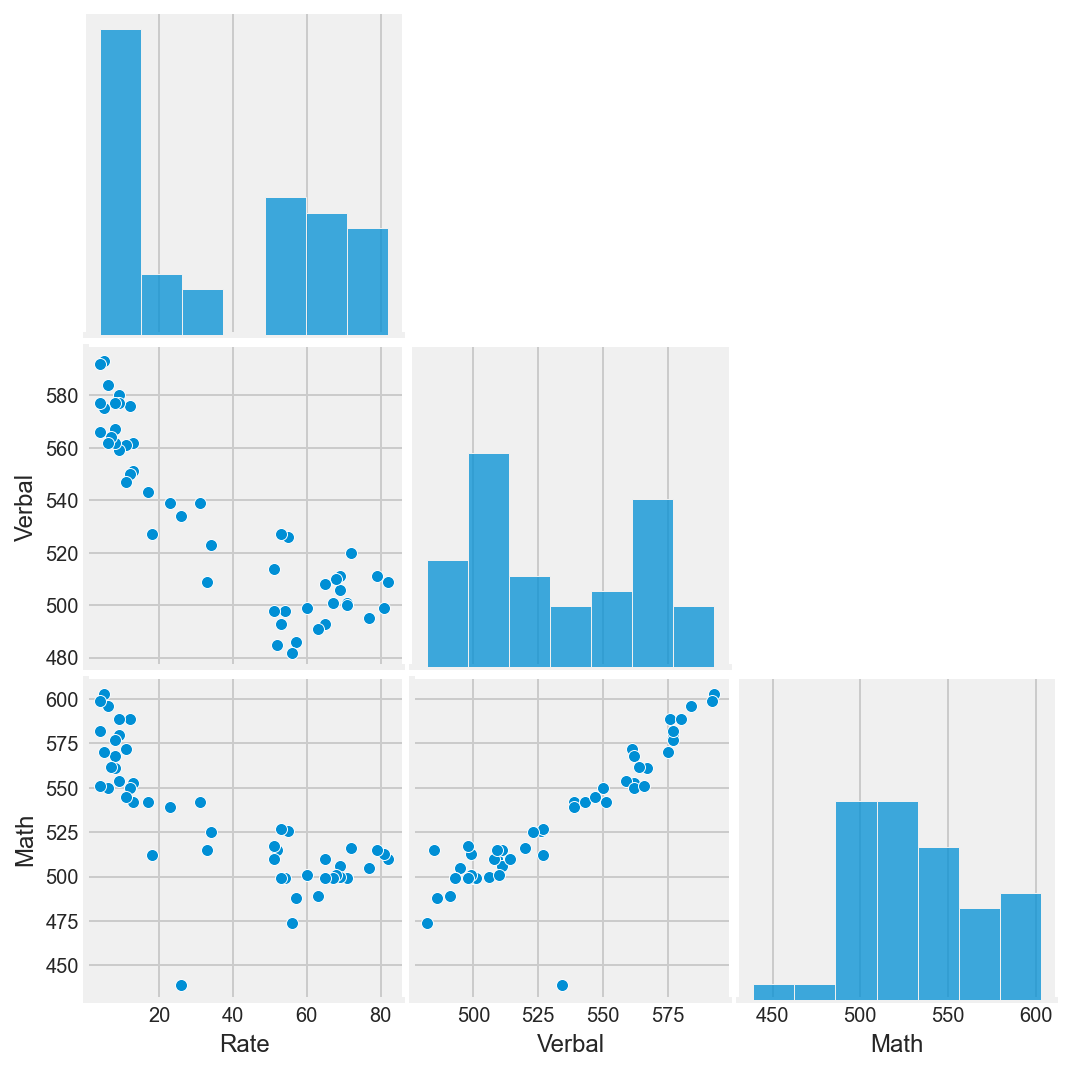

In [15]:
# default pairplot
sns.pairplot(sat_scores_df, corner=True);

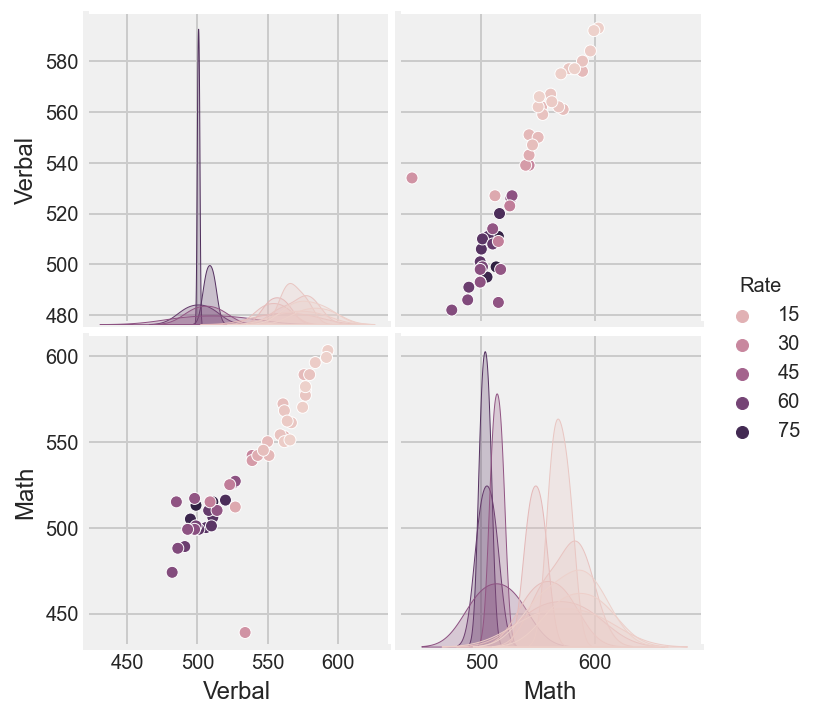

In [16]:
# pairplot Verbal/Math with Rate colouring the distributions
sns.pairplot(sat_scores_df, hue="Rate");

## <span style="color:purple"> _What the pairplots tell me about this data_</span>  

**The first pairplot shows**

- positive covariance between Math and Verbal average scores.
- participation rates above 50% tend to have average Math and Verbal scores grouped around 500.
- participation rates below 25% tend to have average Math and Verbal scores  higher (generally above 525 and majority above 550) than states with participation rates above 50%.

**The second pairplot shows**

- positive covariance between Math and Verbal average scores.
- as participation rate reduces, the Math and Verbal scores go up.
- trend of high participation states (>60%) to have average Verbal/Math scores clustered around 500/500.
- the kde plots show the strong grouping for Verbal scores and more distributed results for Math scores. 

**overall comment about these plots**
- The two groups within the dataset are more visible on the second pairplot, as Verbal and Math are on the similar scale and Rate as a colour highlights the groupings.
- Correlation would usually be used to measure how the variables change together because it compares normalised values.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

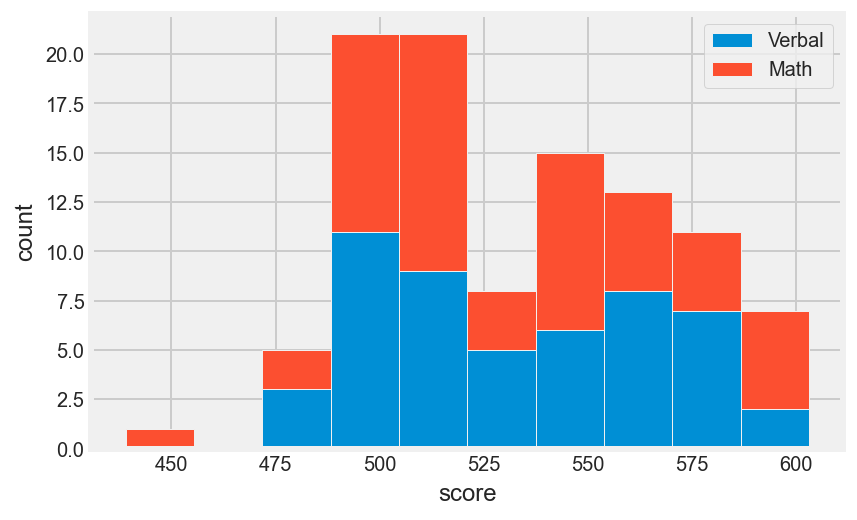

In [17]:

plt.hist(x=(sat_scores_df.Verbal, sat_scores_df.Math), 
         stacked=True, label=('Verbal', 'Math'))

plt.legend(loc='best')
plt.xlabel('score')
plt.ylabel('count')
plt.show()

# blue = Verbal (bottom of stack)
# red = Math (top of stack)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

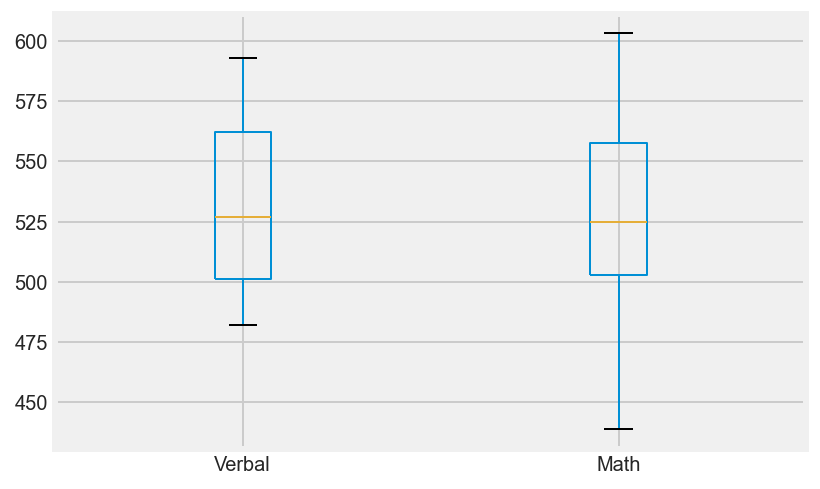

In [18]:
sat_scores_df[['Verbal','Math']].boxplot();

## <span style="color:purple"> _Comments about boxplots, scatterplot, histograms_</span>  

_Q: What are the benefits of using a boxplot as compared to a scatterplot or a histogram?_
- For a single variable: boxplot gives a good visual on range, quartiles (where the majority of values are) and potential outliers.
- For multiple variables: a histogram becomes somewhat unclear if stacked, but somewhat better if transparent non-stacked histogram are used.
- Scatterplots show the relationship between 2 variables, but can't be used to show the relationship between more than 2.  

_Q: What's wrong with plotting a box-plot of Rate on the same chart as Math and Verbal?_  
- Rate has a scale of 0-100 (percentage) & Verbal/Math have a scale of 200-800. 
- It makes no sense to compare a percentage on a scale >100. Also, we lose detail on all of the variables.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


## <span style="color:purple"> _Thoughts about how to plot all on the same boxplot chart_</span>  

- Initially I thought of normalising the values of all 3 variables, but negative and positive values doesn't allow the chart to be intuitive about the story it's telling.
- I then thought that since Rate is already a percentage, it would be more appropriate to compare the percentages of all three.

In [19]:
# option chosen : change Verbal & Math to % of possible range: 200-800

# use .map on columns Math & Verbal: 
#      score as % = (score-200)/ 600 * 100 = score as %
#  0% = 200 (lowest possible score)
#  100% = lowest possible score(200) + 600 (range) = 800 (highest possible score)
# shorter calc with same result is to divide by 6

sat_pct = sat_scores_df.loc[:, ['Rate', 'Math', 'Verbal']]

for col in ['Math', 'Verbal']:
    sat_pct[col] = sat_pct[col].map(lambda x: np.round(((x-200)/6),1))
    
sat_pct.rename(columns={'Math':'Math %', 'Verbal':'Verbal %'}, inplace=True)
sat_pct

,Rate,Math %,Verbal %
0,82,51.7,51.5
1,81,52.2,49.8
2,79,52.5,51.8
3,77,50.8,49.2
4,72,52.7,53.3
5,71,49.8,50.2
6,71,49.8,50.0
7,69,51.0,51.8
8,69,50.0,51.0
9,68,50.2,51.7


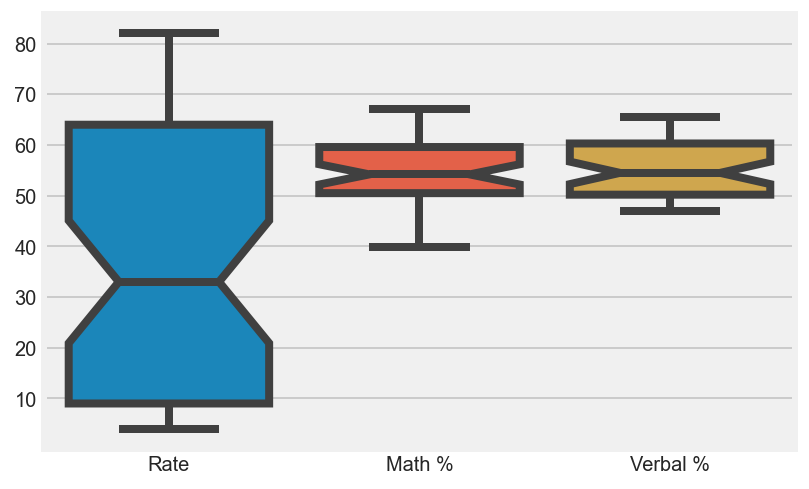

In [20]:
# show boxplot of percentages
sns.boxplot(data=sat_pct, notch=True)
plt.show()


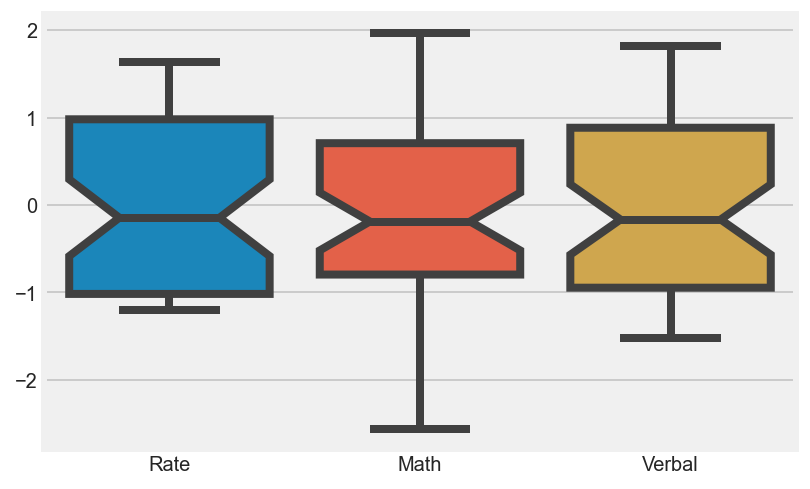

In [21]:
## Because I was curious what it looked like...
## standardise with z-scores & then box plot
sat_std = sat_scores_df.loc[:, ['Rate', 'Math', 'Verbal']]
sat_scores_std = (sat_scores_df - sat_scores_df.mean())/sat_scores_df.std()

sns.boxplot(data=sat_scores_std.loc[:, ['Rate', 'Math', 'Verbal']], notch=True)
plt.show()

# not sure that standarising with z-score is best for non-normally distributed
# negative values aren't very intuitive about what they mean.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [22]:
mean_verbal = np.mean(sat_scores_df['Verbal'])
mean_verbal

532.5294117647059

In [23]:
# create a subset of states that have a Verbal score higher than the mean

above_mean_verbal_df = sat_scores_df[sat_scores_df['Verbal'] > mean_verbal]
print(above_mean_verbal_df.shape)
above_mean_verbal_df.sort_values(by='Verbal')

(24, 4)


,State,Rate,Verbal,Math
27,OH,26,534,439
26,CO,31,539,542
28,MT,23,539,539
30,ID,17,543,542
35,WY,11,547,545
34,KY,12,550,550
32,NM,13,551,542
39,AL,9,559,554
36,MI,11,561,572
31,TN,13,562,553


## <span style="color:purple"> _Comment about average Verbal score_</span> 

_Q: How many states are above the mean? What does this tell you about the distribution of Verbal scores?_

- There are 24 out of 51 states above the average.
- It suggests it might be normally distributed since the number of states above the average is similar to the number below. 

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [24]:
median_verbal = np.median(sat_scores_df['Verbal'])
median_verbal

527.0

In [25]:
# create a subset of states that have a Verbal score higher than the median

above_median_verbal_df = sat_scores_df[sat_scores_df['Verbal'] > median_verbal]
print(above_median_verbal_df.shape)
above_median_verbal_df.sort_values(by='Verbal')

(24, 4)


,State,Rate,Verbal,Math
27,OH,26,534,439
26,CO,31,539,542
28,MT,23,539,539
30,ID,17,543,542
35,WY,11,547,545
34,KY,12,550,550
32,NM,13,551,542
39,AL,9,559,554
36,MI,11,561,572
31,TN,13,562,553


In [26]:
# look at scores under the mean: there isn't any between median & mean
print('mean:', mean_verbal)
print('median:', median_verbal)

sat_scores_df[(sat_scores_df['Verbal'] <= mean_verbal) 
             & (sat_scores_df['Verbal'] > median_verbal)].sort_values(by='Verbal', ascending=False)


mean: 532.5294117647059
median: 527.0


,State,Rate,Verbal,Math


## <span style="color:purple"> _Comment about median Verbal score_</span> 

_Q: How does this compare to the list of states greater than the mean of Verbal scores? Why?_

- The list of states >mean and >median is the same.
- It is the same list because there are no states who scored more than the median and less than the mean.
- It identifies that this is a close-to, but not completely normal distribution as the mean doesn't equal the median.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [27]:
sat_scores_df['Verbal - Math'] = sat_scores_df['Verbal'] - sat_scores_df['Math']
sat_scores_df.head()

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [28]:
# find the top 10 states who have highest difference between Math and Verbal
# with their scores higher on Verbal than Math.
# show the top 3

verbal_sub_df = sat_scores_df.sort_values('Verbal - Math', ascending=False).head(10)
verbal_sub_df.head(3)

,State,Rate,Verbal,Math,Verbal - Math
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


In [29]:
# find the top 10 states who have highest difference between Math and Verbal
# with their scores higher on Math than Verbal.
# show the top 3

math_sub_df = sat_scores_df.sort_values('Verbal - Math', ascending=True).head(10)
math_sub_df.head(3)

,State,Rate,Verbal,Math,Verbal - Math
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


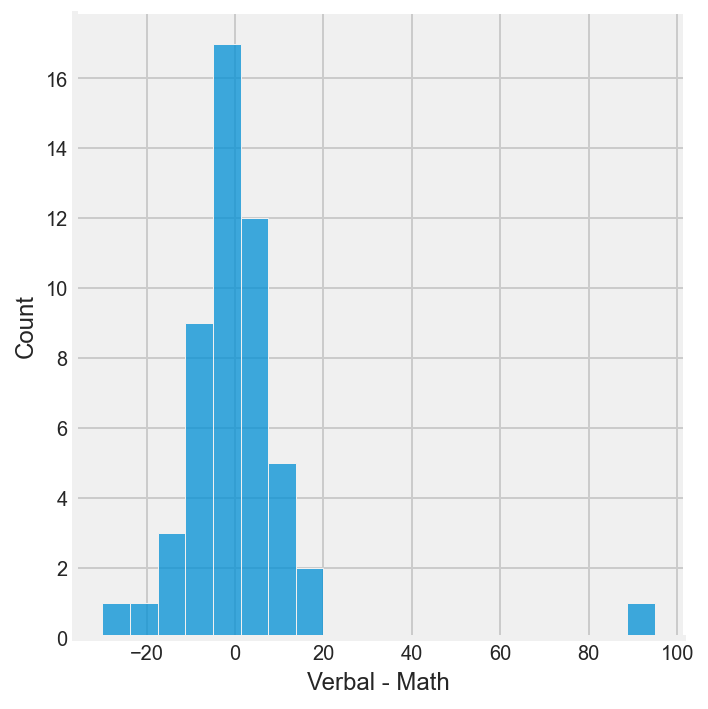

In [30]:
# The highest Verbal-Math difference is 3 times higher than the 
# highest Math-Verbal difference. So I created a histogram to see the distribution.

sns.displot(data=sat_scores_df['Verbal - Math'], bins=20);

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [31]:
sat_scores_df.corr()

,Rate,Verbal,Math,Verbal - Math
Rate,1.000000,-0.888121,-0.773419,-0.098671
Verbal,-0.888121,1.000000,0.899909,0.044527
Math,-0.773419,0.899909,1.000000,-0.395574
Verbal - Math,-0.098671,0.044527,-0.395574,1.000000


## <span style="color:purple"> _Comment about correlation matrix_</span> 

- Math and Verbal average scores are highly & positively correlated.
    - So it is anticipated that a high Verbal or Math average score will also have a high Math or Verbal average score for that State.
- Both Math/Rate and Verbal/Rate are highly & negatively correlated.
    - The States that have a lower participation Rate will be more likely to have higher average Verbal & Math average scores.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [32]:
sat_scores_df.describe()

,Rate,Verbal,Math,Verbal - Math
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


## <span style="color:purple"> _Comment .describe()_</span> 

Rate  
- mean & 50% aren't equal, so distribution skewed
- std of 27 is high for a max possible range of 100 (it's a percentage)
- range from min to max is almost the entire possible range

Verbal  
- mean & 50% aren't equal, so distribution skewed
- std is narrow for max possible range of 600

Math  
- mean & 50% aren't equal, so distribution skewed
- std is narrow for max possible range of 600
- min is low compared to Verbal min

Verbal-Math  
- mean & 50% aren't equal, so distribution skewed
- max value is an 3 times the value of the min value - potential outlier. Q1 & Q3 are at similar distances from the 50%, so definitely positively skewed.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [33]:
# covariance is calculation of whether one variable changes at the same rate as another
# correlation is standardised with values from -1 to 1

sat_scores_df.cov()

,Rate,Verbal,Math,Verbal - Math
Rate,759.04,-816.280000,-773.220000,-43.060000
Verbal,-816.28,1112.934118,1089.404706,23.529412
Math,-773.22,1089.404706,1316.774902,-227.370196
Verbal - Math,-43.06,23.529412,-227.370196,250.899608


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

## <span style="color:purple"> _Background info about dataset_</span>  

About the data (from: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age)
Survey conducted in 2012.
- It covers 13 drugs across 17 age groups. 
- age groups: number of years covered by each age group isn't equal. Assumption: this is due to focus of article using this dataset being on a specific age group (50-64).
- Assume 'n' is the number of people in the age group.
- _drug_ USE : Percentage of those in an age group who used _drug_ in the past 12 months
- _drug_ FREQUENCY : Median number of times a user in an age group used _drug_ in the past 12 months

## <span style="color:purple"> _Import Data_</span>  


In [34]:
path_to_file = './datasets-p2/drug-use-by-age.csv'

explore_df = pd.read_csv(path_to_file)

print(explore_df.shape)
explore_df.info()

(17, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17 non-null     object 
 1   n                        17 non-null     int64  
 2   alcohol-use              17 non-null     float64
 3   alcohol-frequency        17 non-null     float64
 4   marijuana-use            17 non-null     float64
 5   marijuana-frequency      17 non-null     float64
 6   cocaine-use              17 non-null     float64
 7   cocaine-frequency        17 non-null     object 
 8   crack-use                17 non-null     float64
 9   crack-frequency          17 non-null     object 
 10  heroin-use               17 non-null     float64
 11  heroin-frequency         17 non-null     object 
 12  hallucinogen-use         17 non-null     float64
 13  hallucinogen-frequency   17 non-null     float64
 14  inhalant-use       

In [35]:
# rename pain-releiver-use & pain-releiver-frequency to correct for spelling mistake
explore_df.rename(columns={'pain-releiver-use':'pain-reliever-use', 
                   'pain-releiver-frequency':'pain-reliever-frequency'}, inplace=True)

In [36]:
# Rest of column names appear ok & lower case. 
# Identify list columns of type 'object' which may need to be converted.

cols_type_object = explore_df.select_dtypes(include='object').columns
cols_type_object

Index(['age', 'cocaine-frequency', 'crack-frequency', 'heroin-frequency',
       'inhalant-frequency', 'oxycontin-frequency', 'meth-frequency'],
      dtype='object')

In [37]:
# look at the top few rows of data & see if it seems coherent
explore_df.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [38]:
# look at last few rows & check for total row
explore_df.tail()

# >> no total row

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


## <span style="color:purple"> _Data Cleaning_</span>  


In [39]:
# already identified columns of type 'object' and now to evaluate 
# for conversion to numerical type
cols_type_object

Index(['age', 'cocaine-frequency', 'crack-frequency', 'heroin-frequency',
       'inhalant-frequency', 'oxycontin-frequency', 'meth-frequency'],
      dtype='object')

In [40]:
# find what might be causing columns to be inferred to be object when they appear numerical
# in .head & .tail
for col in cols_type_object:
    print(col, ':', explore_df[col].unique())
    print('-----')


age : ['12' '13' '14' '15' '16' '17' '18' '19' '20' '21' '22-23' '24-25' '26-29'
 '30-34' '35-49' '50-64' '65+']
-----
cocaine-frequency : ['5.0' '1.0' '5.5' '4.0' '7.0' '8.0' '6.0' '15.0' '36.0' '-']
-----
crack-frequency : ['-' '3.0' '9.5' '1.0' '21.0' '10.0' '2.0' '5.0' '17.0' '6.0' '15.0'
 '48.0' '62.0']
-----
heroin-frequency : ['35.5' '-' '2.0' '1.0' '66.5' '64.0' '46.0' '180.0' '45.0' '30.0' '57.5'
 '88.0' '50.0' '66.0' '280.0' '41.0' '120.0']
-----
inhalant-frequency : ['19.0' '12.0' '5.0' '5.5' '3.0' '4.0' '2.0' '3.5' '10.0' '13.5' '-']
-----
oxycontin-frequency : ['24.5' '41.0' '4.5' '3.0' '4.0' '6.0' '7.0' '7.5' '12.0' '13.5' '17.5'
 '20.0' '46.0' '5.0' '-']
-----
meth-frequency : ['-' '5.0' '24.0' '10.5' '36.0' '48.0' '12.0' '105.0' '2.0' '46.0' '21.0'
 '30.0' '54.0' '104.0']
-----


In [41]:
# function to create a mask dataframe for specified var
def mask_multi_col(data, columns, var):
    mask_df = pd.DataFrame()
    for col in columns:
        mask_df[col] = data[col] == var
        
    return mask_df

In [42]:
# create mask for all rows & columns with '-'
hyphen_mask_df = mask_multi_col(explore_df, cols_type_object, '-')
hyphen_mask_df

,age,cocaine-frequency,crack-frequency,heroin-frequency,inhalant-frequency,oxycontin-frequency,meth-frequency
0,False,False,True,False,False,False,True
1,False,False,False,True,False,False,False
2,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [43]:
# show only rows which contain specific var -- there should be an easier way to do this
def show_rows(data, columns, var):
    rows = set()
    for i in range(len(data)):
        for col in columns:
            if data.loc[i][col] == var:
                rows.add(i)

    return data.loc[rows].T

In [44]:
# look at columns with '-'
show_rows(explore_df, cols_type_object, '-')
# only shows an output before cleaning is done

,0,1,2,16
age,12,13,14,65+
n,2798,2757,2792,2448
alcohol-use,3.9,8.5,18.1,49.3
alcohol-frequency,3.0,6.0,5.0,52.0
marijuana-use,1.1,3.4,8.7,1.2
marijuana-frequency,4.0,15.0,24.0,36.0
cocaine-use,0.1,0.1,0.1,0.0
cocaine-frequency,5.0,1.0,5.5,-
crack-use,0.0,0.0,0.0,0.0
crack-frequency,-,3.0,-,-


In [45]:
# compare to columns with '0.0'/0.0
show_rows(explore_df, explore_df.columns, 0)

,0,1,2,4,16
age,12,13,14,16,65+
n,2798,2757,2792,3058,2448
alcohol-use,3.9,8.5,18.1,40.1,49.3
alcohol-frequency,3.0,6.0,5.0,10.0,52.0
marijuana-use,1.1,3.4,8.7,22.5,1.2
marijuana-frequency,4.0,15.0,24.0,30.0,36.0
cocaine-use,0.1,0.1,0.1,1.0,0.0
cocaine-frequency,5.0,1.0,5.5,7.0,-
crack-use,0.0,0.0,0.0,0.0,0.0
crack-frequency,-,3.0,-,1.0,-


### <span style="color:purple"> _Observations_</span>  

1. Where use = '0.0', frequency has been set to '-'. Assume this is where no responses have been received for that frequency & age group
2. Therefore frequency could be set to '0.0' or 'NaN' and allow conversion from object to float.
3. Also, identified that whereever use='0.0', frequency > '0.0' is likely to be erroneous/outlier, e.g. heroin-freq for 65+.

### <span style="color:purple"> _Convert values & columns_</span>  

- convert '-' to 0 
- convert object.type to float.type
- leave 'age' column for now

(originally converted - convert '-' to NaN but caused difficulties when analysing)

In [46]:
# replace '-' with 0 so entire dataframe will be used for calculating 
for col in cols_type_object:
    mask_series = pd.Series(hyphen_mask_df[col])
    explore_df.loc[mask_series, col] = 0

In [47]:
explore_df.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [48]:
# convert string to float and return DataFrame with updated dtypes
# probably an easier way to do this, but this works so using it for now

def df_obj_to_float(data, columns):
    for col in columns:
        try:
            data[col] = data[col].astype(float)
        except:
            pass
    return


In [49]:
# convert all possible columns to floats
df_obj_to_float(explore_df, cols_type_object)
explore_df.info()  
# confirm all -use & -frequency variables are floats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17 non-null     object 
 1   n                        17 non-null     int64  
 2   alcohol-use              17 non-null     float64
 3   alcohol-frequency        17 non-null     float64
 4   marijuana-use            17 non-null     float64
 5   marijuana-frequency      17 non-null     float64
 6   cocaine-use              17 non-null     float64
 7   cocaine-frequency        17 non-null     float64
 8   crack-use                17 non-null     float64
 9   crack-frequency          17 non-null     float64
 10  heroin-use               17 non-null     float64
 11  heroin-frequency         17 non-null     float64
 12  hallucinogen-use         17 non-null     float64
 13  hallucinogen-frequency   17 non-null     float64
 14  inhalant-use             17 

### <span style="color:purple"> _Thoughts about 'age' and potential outliers when usage=0.0_</span>  

- For initial overview of data, leave 'age' as is. There are ways to work with it as groups.
- Variables where usage=0.0 with freq>0, are potential outliers:
    - crack-frequency
    - heroin-frequency
    - stimulant-frequency
    - sedative-frequency

In [50]:
# drug_u_f_list : create list of lists of [-use, -frequency] pairs
column_list = list(explore_df.columns)
drug_u_f_list = [[column_list[i], column_list[i+1]] 
                 for i in range(2, len(list(column_list)), 2)]
drug_u_f_list

[['alcohol-use', 'alcohol-frequency'],
 ['marijuana-use', 'marijuana-frequency'],
 ['cocaine-use', 'cocaine-frequency'],
 ['crack-use', 'crack-frequency'],
 ['heroin-use', 'heroin-frequency'],
 ['hallucinogen-use', 'hallucinogen-frequency'],
 ['inhalant-use', 'inhalant-frequency'],
 ['pain-reliever-use', 'pain-reliever-frequency'],
 ['oxycontin-use', 'oxycontin-frequency'],
 ['tranquilizer-use', 'tranquilizer-frequency'],
 ['stimulant-use', 'stimulant-frequency'],
 ['meth-use', 'meth-frequency'],
 ['sedative-use', 'sedative-frequency']]

In [51]:
# view drugs where usage=0.0 with freq>0

explore_df[drug_u_f_list[3]][ explore_df['crack-use'] == 0.0 ]

,crack-use,crack-frequency
0,0.0,0.0
1,0.0,3.0
2,0.0,0.0
4,0.0,1.0
16,0.0,0.0


In [52]:
explore_df[drug_u_f_list[4]][ explore_df['heroin-use'] == 0.0 ]

,heroin-use,heroin-frequency
1,0.0,0.0
16,0.0,120.0


In [53]:
explore_df[drug_u_f_list[10]][ explore_df['stimulant-use'] == 0.0 ]

,stimulant-use,stimulant-frequency
16,0.0,364.0


In [54]:
explore_df[drug_u_f_list[12]][ explore_df['sedative-use'] == 0.00 ]

,sedative-use,sedative-frequency
16,0.0,15.0


### <span style="color:purple"> _Zero-out values for freq, when use=0.0_</span>  

- Change drug frequency, where use=0.0, to =0
    - With an age group 'n' of over 2000, a use percent of 0.0 indicates a very small number of people, potentially even just 1 response (I'm especially looking at you, stimulant-frequency of every day of the year for people aged 65+).  Thus I am considering them as outliers removing them from my dataset for analysis, by changing their values to 0.

In [55]:
# manually change in my dataset

explore_df.loc[1,'crack-frequency'] = 0
explore_df.loc[4,'crack-frequency'] = 0

explore_df.loc[16,'heroin-frequency'] = 0

explore_df.loc[16,'stimulant-frequency'] = 0

explore_df.loc[16,'sedative-frequency'] = 0


In [56]:
# check for columns with '0.0'/0.0
show_rows(explore_df, explore_df.columns, 0)

,0,1,2,4,16
age,12,13,14,16,65+
n,2798,2757,2792,3058,2448
alcohol-use,3.9,8.5,18.1,40.1,49.3
alcohol-frequency,3.0,6.0,5.0,10.0,52.0
marijuana-use,1.1,3.4,8.7,22.5,1.2
marijuana-frequency,4.0,15.0,24.0,30.0,36.0
cocaine-use,0.1,0.1,0.1,1.0,0.0
cocaine-frequency,5.0,1.0,5.5,7.0,0.0
crack-use,0.0,0.0,0.0,0.0,0.0
crack-frequency,0.0,0.0,0.0,0.0,0.0


In [57]:
# create new dataframe to use for next section
# that way I can get back to a cleaned/prepared version of the dataset when needed
drug_df = explore_df[:]

In [58]:
# what do descriptive stats look like now
drug_df.describe().T

,count,mean,std,min,25%,50%,75%,max
n,17.0,3251.058824,1297.890426,2223.0,2469.0,2798.0,3058.0,7391.0
alcohol-use,17.0,55.429412,26.878866,3.9,40.1,64.6,77.5,84.2
alcohol-frequency,17.0,33.352941,21.318833,3.0,10.0,48.0,52.0,52.0
marijuana-use,17.0,18.923529,11.959752,1.1,8.7,20.8,28.4,34.0
marijuana-frequency,17.0,42.941176,18.362566,4.0,30.0,52.0,52.0,72.0
cocaine-use,17.0,2.176471,1.816772,0.0,0.5,2.0,4.0,4.9
cocaine-frequency,17.0,7.411765,8.014119,0.0,5.0,5.0,7.0,36.0
crack-use,17.0,0.294118,0.235772,0.0,0.0,0.4,0.5,0.6
crack-frequency,17.0,12.147059,17.519422,0.0,0.0,6.0,15.0,62.0
heroin-use,17.0,0.352941,0.333762,0.0,0.1,0.2,0.6,1.1


---
### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

## <span style="color:purple"> _Overview of Data_</span>  

Info about lists and data subsets I'll be using  
- drug_df : cleaned drug-use-by-age data
- drug_u_f_list : list of lists of [-use, -frequency] pairs
- drug_list : create list of drug names
- drug_use : create list of drug-use
- drug_freq : create list of drug-freq
- age_use : create subset of drug-use, with age as index
- age_freq : create subset of drug-freq, with age as index

In [59]:
# drug_list : create list of drug names
drug_list = [drug_u_f_list[i][0].replace('-use','') for i in range(len(drug_u_f_list))]
drug_list

['alcohol',
 'marijuana',
 'cocaine',
 'crack',
 'heroin',
 'hallucinogen',
 'inhalant',
 'pain-reliever',
 'oxycontin',
 'tranquilizer',
 'stimulant',
 'meth',
 'sedative']

In [60]:
# drug_use : create list of drug-use
drug_use = [drug_u_f_list[i][0] for i in range(len(drug_u_f_list))]
drug_use

['alcohol-use',
 'marijuana-use',
 'cocaine-use',
 'crack-use',
 'heroin-use',
 'hallucinogen-use',
 'inhalant-use',
 'pain-reliever-use',
 'oxycontin-use',
 'tranquilizer-use',
 'stimulant-use',
 'meth-use',
 'sedative-use']

In [61]:
# drug_freq : create list of drug-freq
drug_freq = [drug_u_f_list[i][1] for i in range(len(drug_u_f_list))]
drug_freq

['alcohol-frequency',
 'marijuana-frequency',
 'cocaine-frequency',
 'crack-frequency',
 'heroin-frequency',
 'hallucinogen-frequency',
 'inhalant-frequency',
 'pain-reliever-frequency',
 'oxycontin-frequency',
 'tranquilizer-frequency',
 'stimulant-frequency',
 'meth-frequency',
 'sedative-frequency']

In [62]:
# age_use : create subset of drug-use, with age as index
age_use = drug_df[['age'] + drug_use ]
age_use.set_index('age', inplace=True)

In [63]:
# age_freq : create subset of drug-freq, with age as index
age_freq = drug_df[['age'] + drug_freq]
age_freq.set_index('age', inplace=True)

In [64]:
print('age_use', age_use.shape)
print('age_freq', age_freq.shape)

age_use (17, 13)
age_freq (17, 13)


---
### <span style="color:purple"> _Start with .describe() statistics of cleaned/prepared dataset_</span>  


In [65]:
# full .describe for the dataset
drug_df.describe().T

,count,mean,std,min,25%,50%,75%,max
n,17.0,3251.058824,1297.890426,2223.0,2469.0,2798.0,3058.0,7391.0
alcohol-use,17.0,55.429412,26.878866,3.9,40.1,64.6,77.5,84.2
alcohol-frequency,17.0,33.352941,21.318833,3.0,10.0,48.0,52.0,52.0
marijuana-use,17.0,18.923529,11.959752,1.1,8.7,20.8,28.4,34.0
marijuana-frequency,17.0,42.941176,18.362566,4.0,30.0,52.0,52.0,72.0
cocaine-use,17.0,2.176471,1.816772,0.0,0.5,2.0,4.0,4.9
cocaine-frequency,17.0,7.411765,8.014119,0.0,5.0,5.0,7.0,36.0
crack-use,17.0,0.294118,0.235772,0.0,0.0,0.4,0.5,0.6
crack-frequency,17.0,12.147059,17.519422,0.0,0.0,6.0,15.0,62.0
heroin-use,17.0,0.352941,0.333762,0.0,0.1,0.2,0.6,1.1


In [66]:
# compare mean, median (50%), and std
drug_df.describe().iloc[[1,5,2]].T.sort_values(by='50%', ascending=False)

,mean,50%,std
n,3251.058824,2798.0,1297.890426
alcohol-use,55.429412,64.6,26.878866
marijuana-frequency,42.941176,52.0,18.362566
alcohol-frequency,33.352941,48.0,21.318833
heroin-frequency,61.911765,46.0,70.732603
meth-frequency,31.735294,24.0,32.206423
marijuana-use,18.923529,20.8,11.959752
oxycontin-frequency,13.941176,12.0,12.902134
pain-reliever-frequency,14.705882,12.0,6.935098
tranquilizer-frequency,11.735294,10.0,11.485205


In [67]:
# for drug use variables only - compare mean, median (50%), and std
# choose sort line & comment out the other two

age_use.describe().iloc[[1,5,2]].T.sort_values(by='50%', ascending=False)
# age_use.describe().iloc[[1,5,2]].T.sort_values(by='mean', ascending=False)
# age_use.describe().iloc[[1,5,2]].T.sort_values(by='std', ascending=False)

,mean,50%,std
alcohol-use,55.429412,64.6,26.878866
marijuana-use,18.923529,20.8,11.959752
pain-reliever-use,6.270588,6.2,3.166379
tranquilizer-use,2.805882,3.5,1.753379
hallucinogen-use,3.394118,3.2,2.792506
cocaine-use,2.176471,2.0,1.816772
stimulant-use,1.917647,1.8,1.407673
inhalant-use,1.388235,1.4,0.927283
oxycontin-use,0.935294,1.1,0.608216
crack-use,0.294118,0.4,0.235772


In [68]:
# for drug frequency variables only - compare mean, median (50%), and std
# choose sort line & comment out the other two

age_freq.describe().iloc[[1,5,2]].T.sort_values(by='50%', ascending=False)
# age_freq.describe().iloc[[1,5,2]].T.sort_values(by='mean', ascending=False)
# age_freq.describe().iloc[[1,5,2]].T.sort_values(by='std', ascending=False)

,mean,50%,std
marijuana-frequency,42.941176,52.0,18.362566
alcohol-frequency,33.352941,48.0,21.318833
heroin-frequency,61.911765,46.0,70.732603
meth-frequency,31.735294,24.0,32.206423
pain-reliever-frequency,14.705882,12.0,6.935098
oxycontin-frequency,13.941176,12.0,12.902134
tranquilizer-frequency,11.735294,10.0,11.485205
sedative-frequency,18.500000,10.0,25.261755
stimulant-frequency,9.735294,9.5,6.369158
crack-frequency,12.147059,6.0,17.519422


### <span style="color:purple"> _Observations about .describe() statistics of cleaned/prepared dataset & subsets_</span>  

- With so many variables, nothing really jumps out from the overall dataset.
    - Except heroin freq of 280.0, at use rate of 1.1 - potentially another outlier.
- Comparing just compare mean, median (50%), and std (decending sort by median) : some possibilities, but I think will be clearer by looking at groups of -use, -freq.
- **Drug-use:** mean & median are similar for most drugs. There are some clear groupings already:
    - Alcohol & Marijuana
    - Pain-releiver
    - rest under 5% of use.
- **Drug-freq:** mean & median are similar for most drugs, except Heroin (which has a very large std as well - more likelyhood of an outlier/anomoly in its data). There are some clear groupings already:
    - Marijuana, Alcohol & Heroin ... Heroin freq seems out of place for an overall ranking
    - Meth ... this also seems out of place for an overall ranking
    - Pain-releiver, Oxycontin, Tranquilizer, Sedative, Stimulant
    - rest 6% or under for frequency.

### <span style="color:purple"> _Next, heatmaps, covariance & other visuals_</span>  



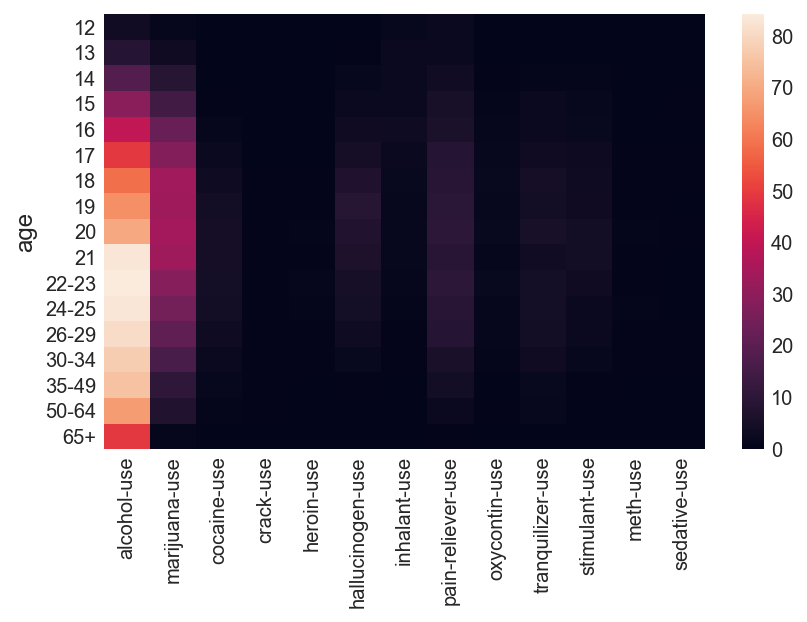

In [69]:
# correlated against age groups
sns.heatmap(age_use);

# alcohol use is high across many age groups

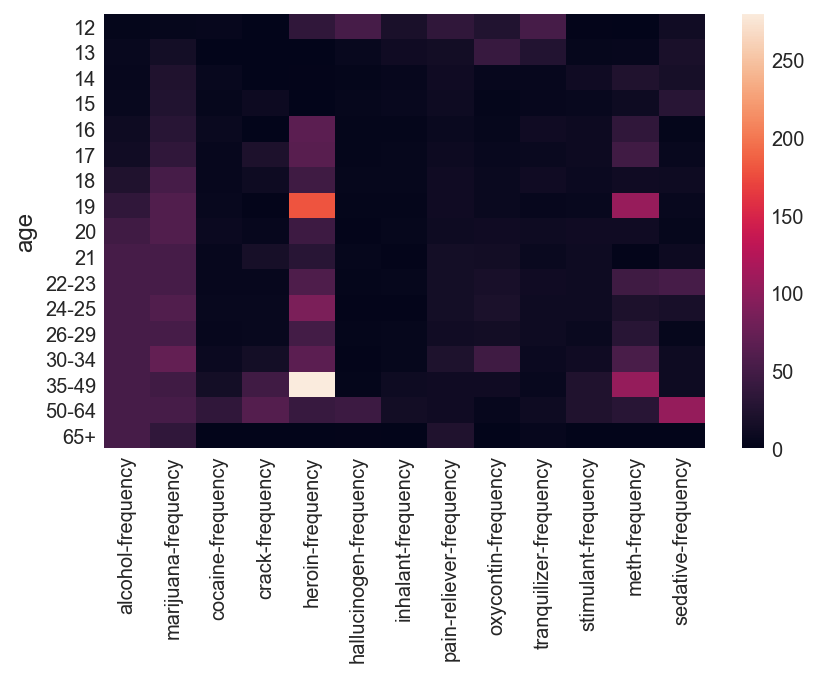

In [70]:
# correlated against age groups (rows 0-16)
sns.heatmap(age_freq);

# some bright points across the age groups - heroin potential outliers visible

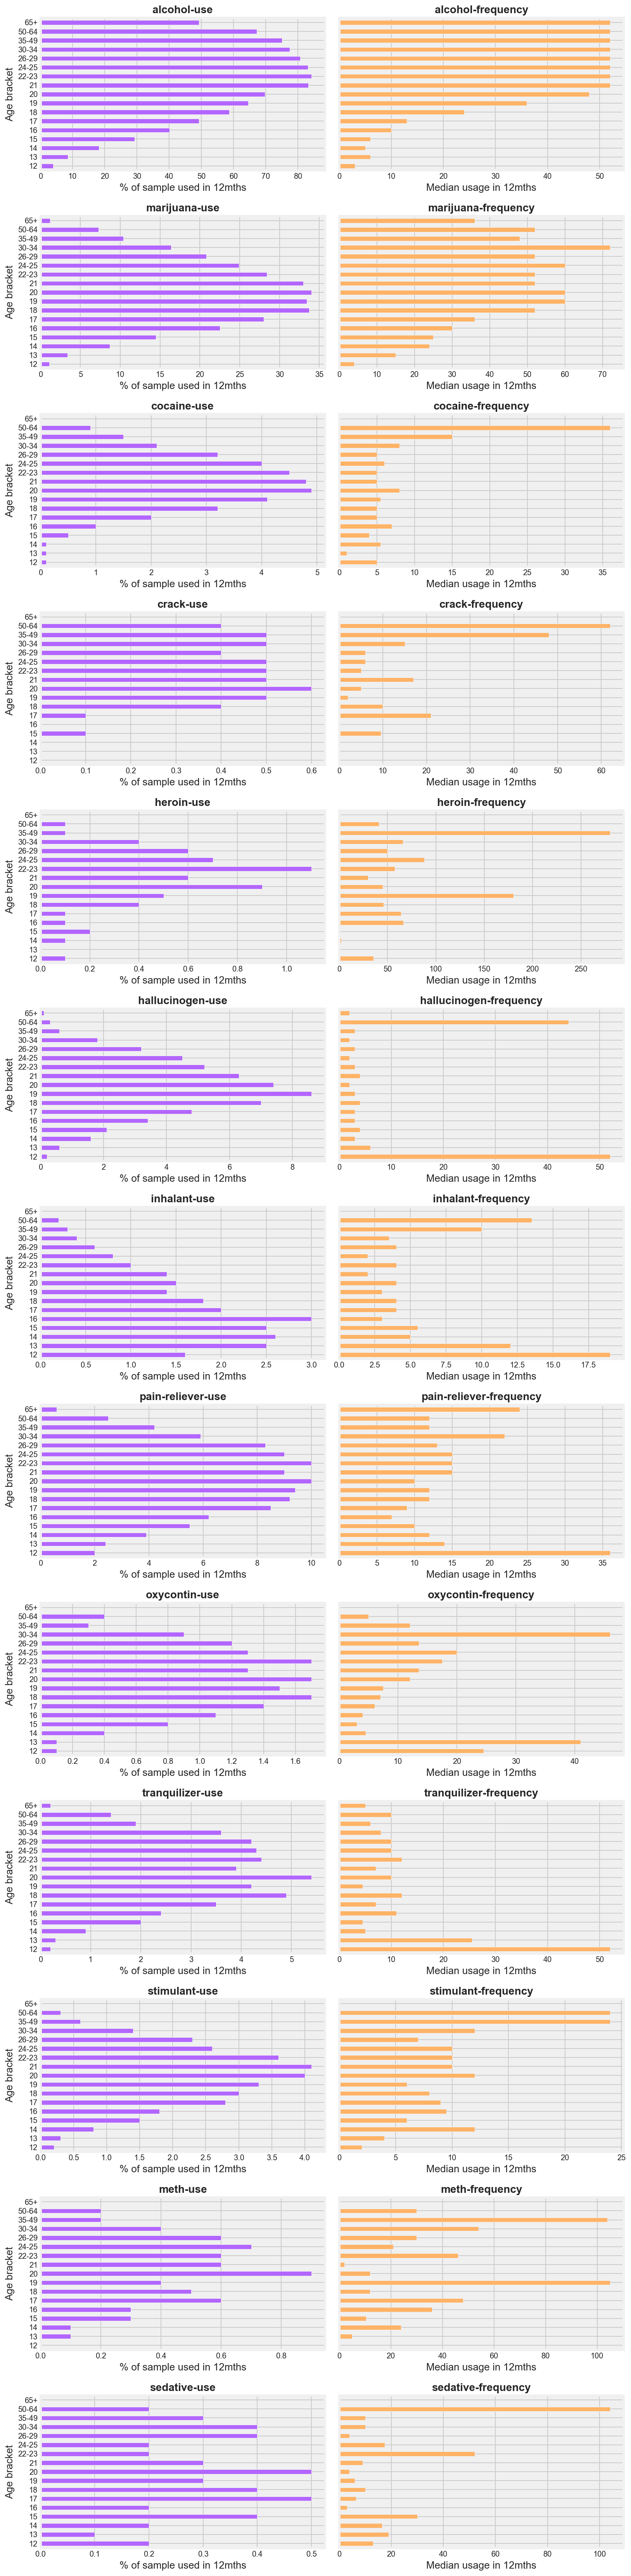

In [71]:
# Plot out all drug-use and drug-freq against the Age brackets to view the variation across all

# assign fig and axis vars for subplot
fig, axs = plt.subplots(13, 2, figsize=(12,60))
# Loop through DFs and plot out the usage coincident with freq for each type
for x, y in enumerate(drug_use):
    # Drug usage plot and axis settings
    age_use[y].plot(kind='barh', ax=axs[x,0], color = '#b366ff')
    axs[x,0].set_title(y,fontsize=14, fontweight='bold')
    axs[x,0].set_ylabel('Age bracket',fontsize=13)
    axs[x,0].set_xlabel('% of sample used in 12mths',fontsize=13)
    #Drug frequency plot and axis settings
    age_freq[drug_freq[x]].plot(kind='barh', ax=axs[x,1], color = '#ffb366', sharey=True)
    axs[x,1].set_title(drug_freq[x],fontsize=14, fontweight='bold')
    axs[x,1].set_xlabel('Median usage in 12mths',fontsize=13)
plt.subplots_adjust(hspace=0.3, wspace=0.05)     #modify the spacing between the plot axes 
plt.show()

# thanks to Russell for the code to make this good & pretty :)

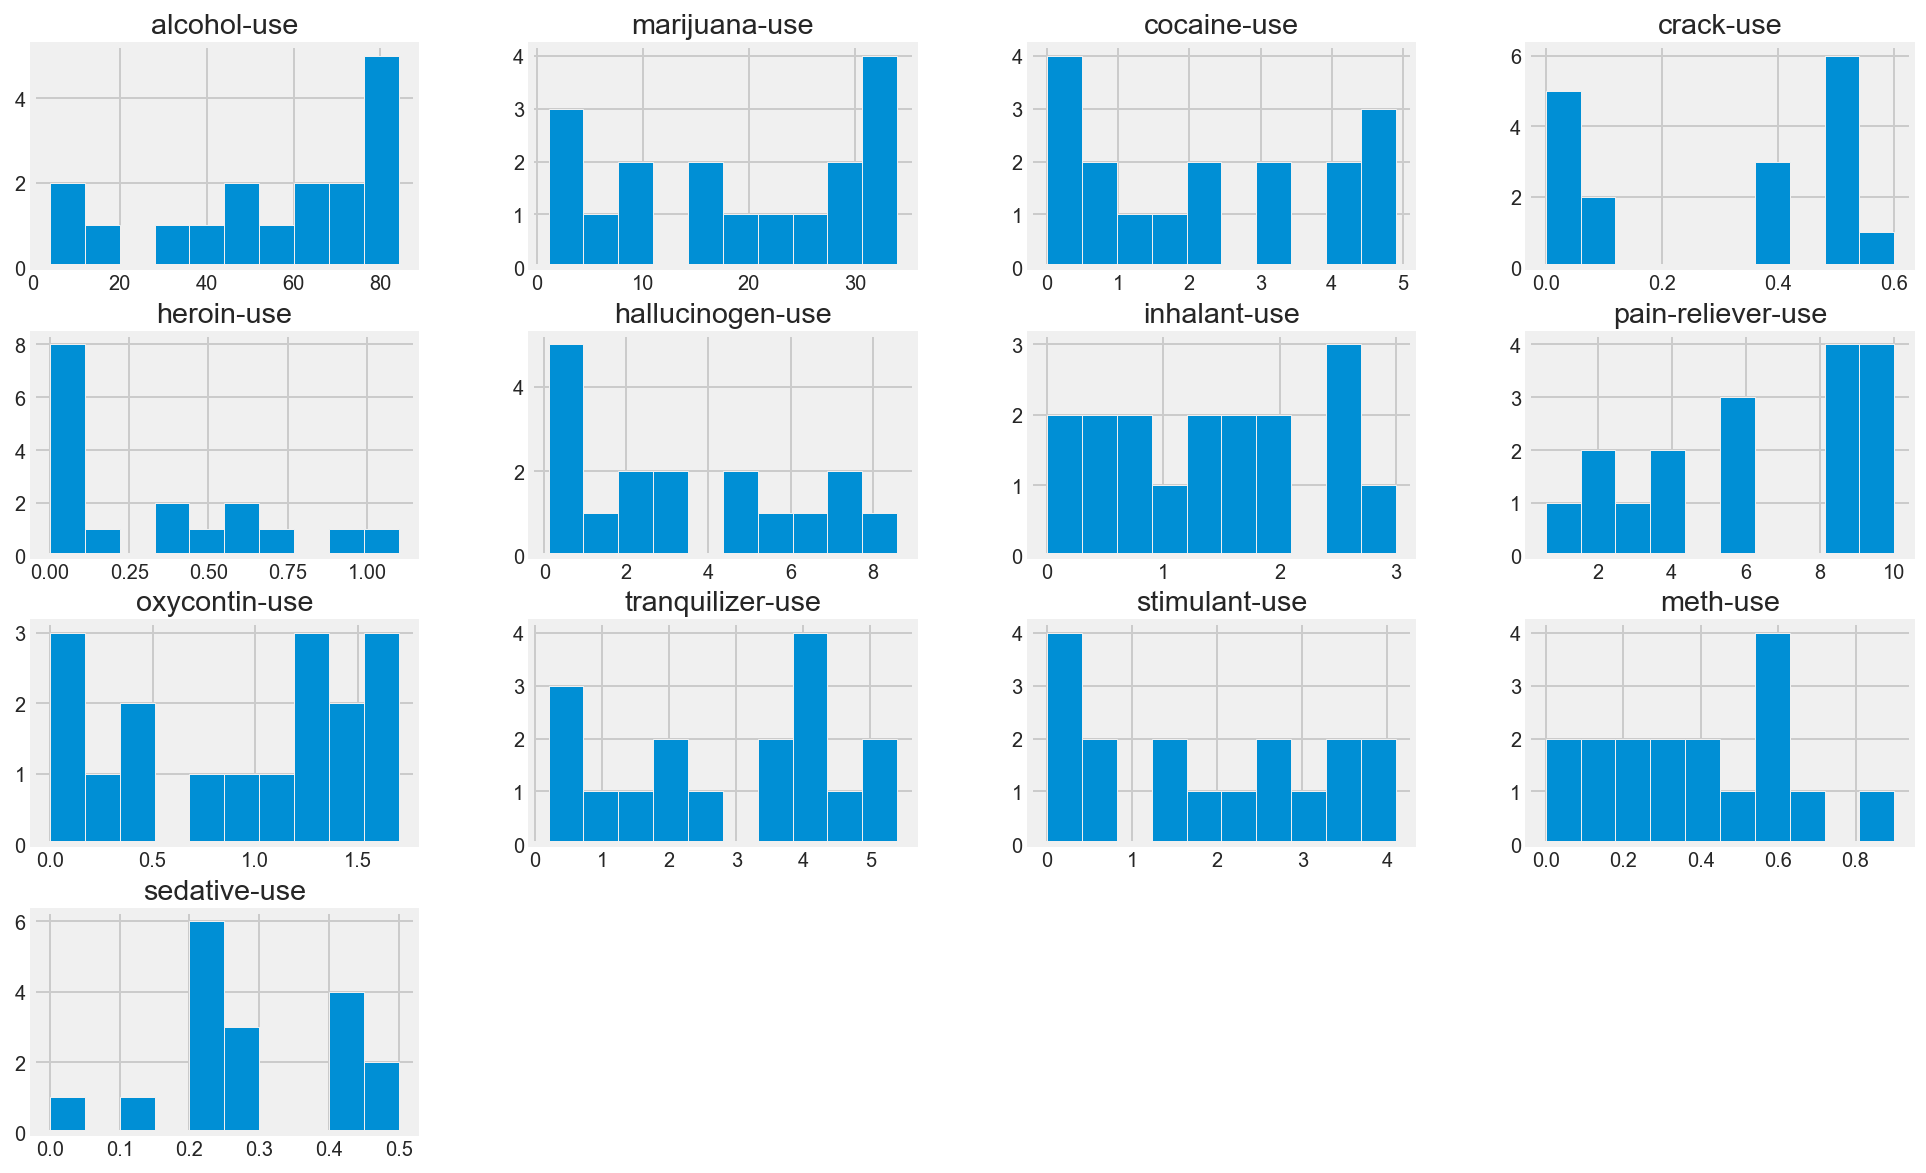

In [72]:
drug_df[drug_use].hist(figsize=(15,10));

# alcohol & marijuana are the only two with use over 30% of the sample

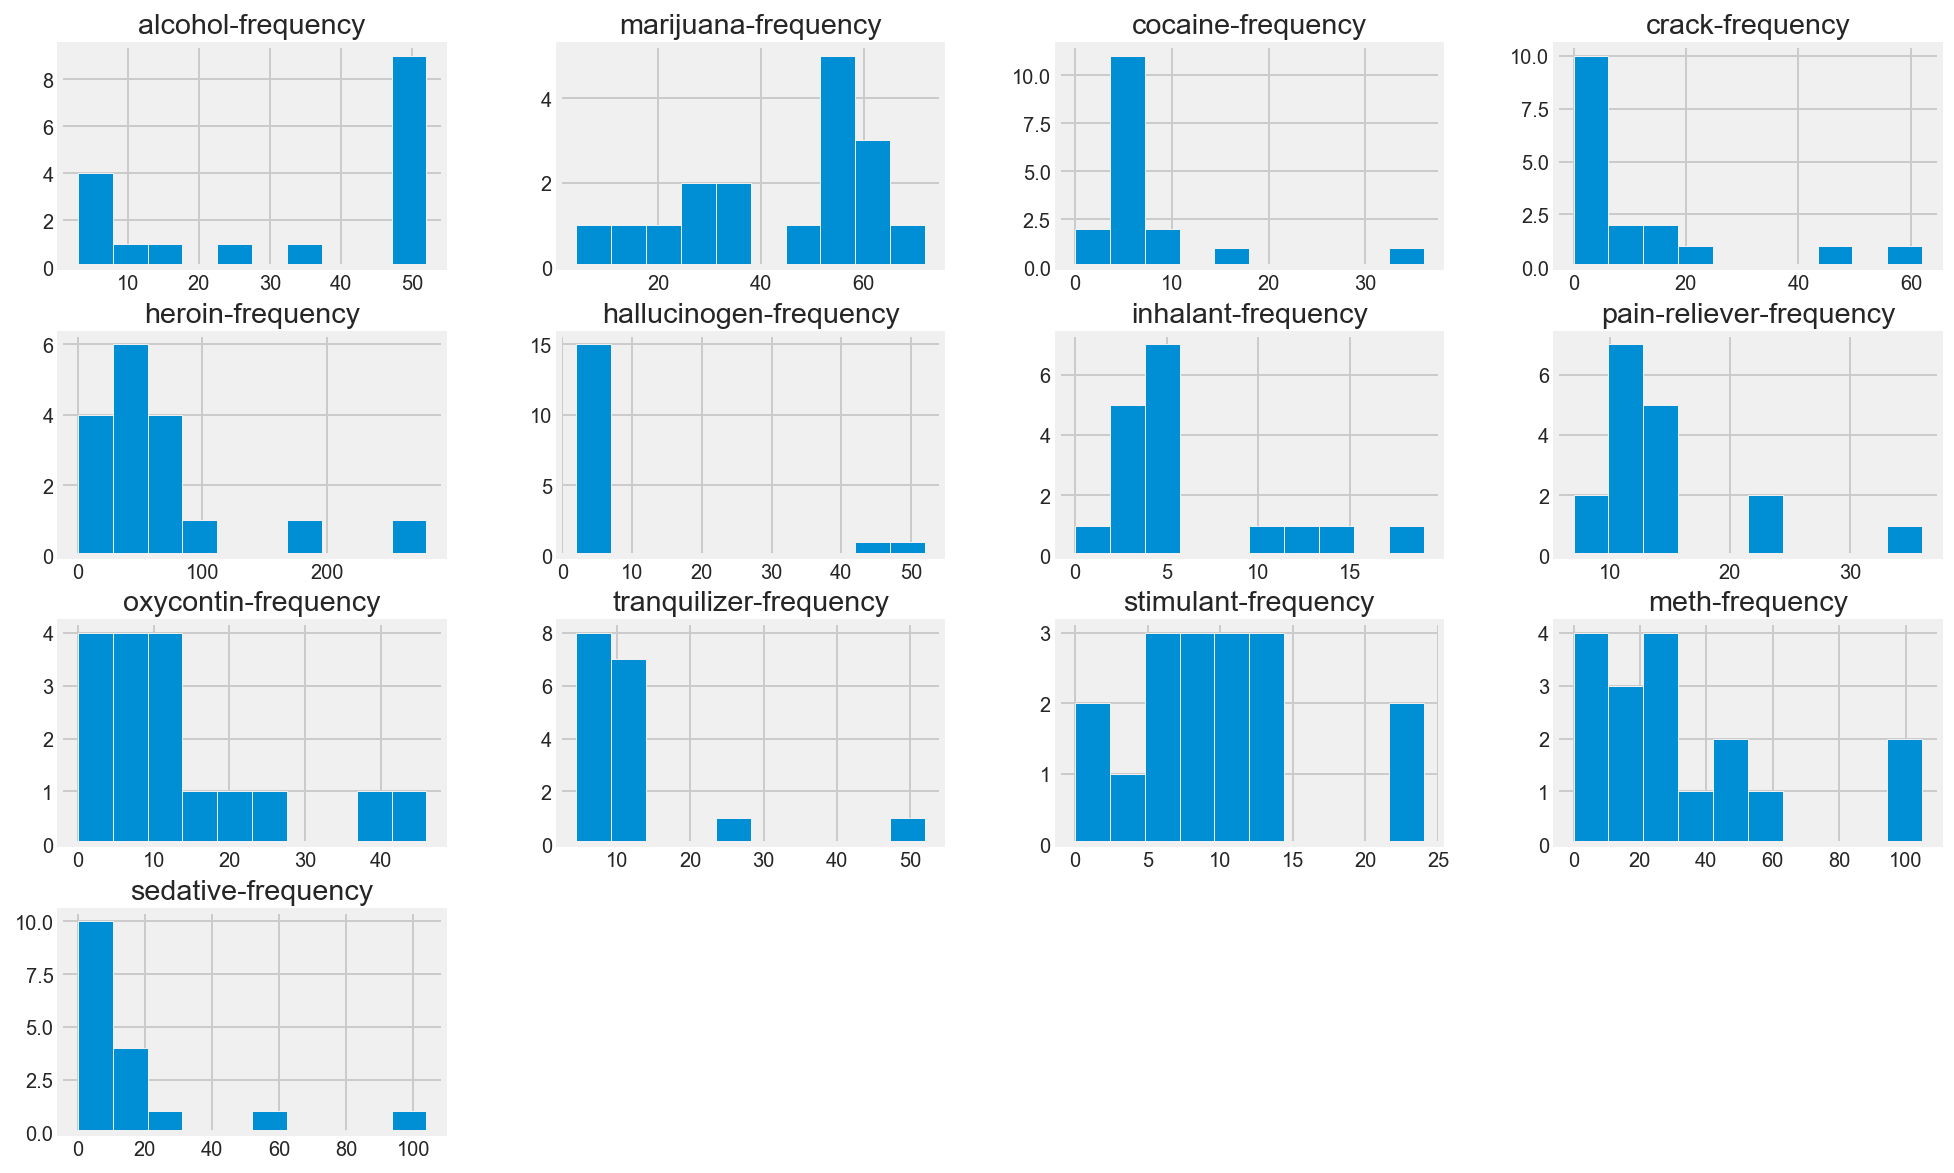

In [73]:
drug_df[drug_freq].hist(figsize=(15,10));

# median number of times used in a year

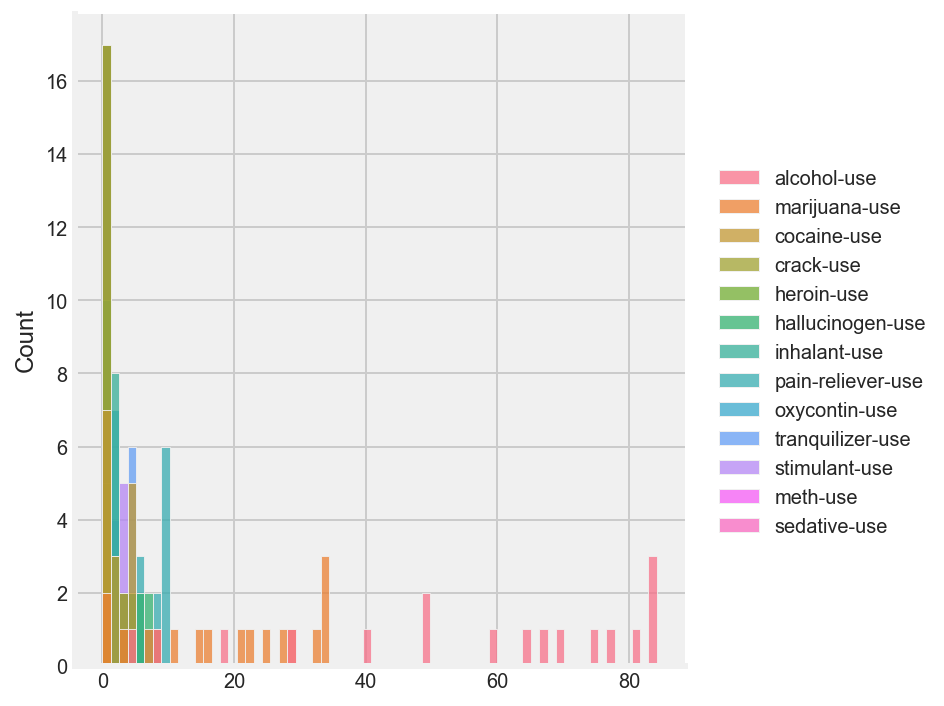

In [74]:
# all usage on one overlapping histogram
sns.displot(drug_df[drug_use]);
# usage is grouped < ~15% of total
# exception is alcohol use

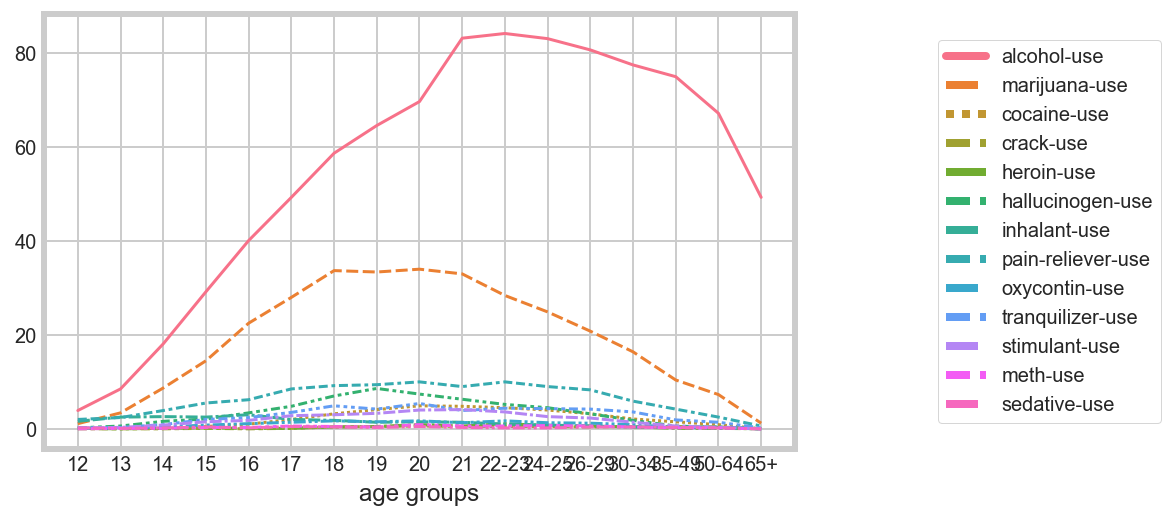

In [75]:
# all usage across age groups
with sns.axes_style('whitegrid'):
    g = sns.lineplot(data=age_use, linewidth=1.5)

    # Put a legend to the right side
    g.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), ncol=1)
    g.set_xlabel('age groups')
    plt.show()

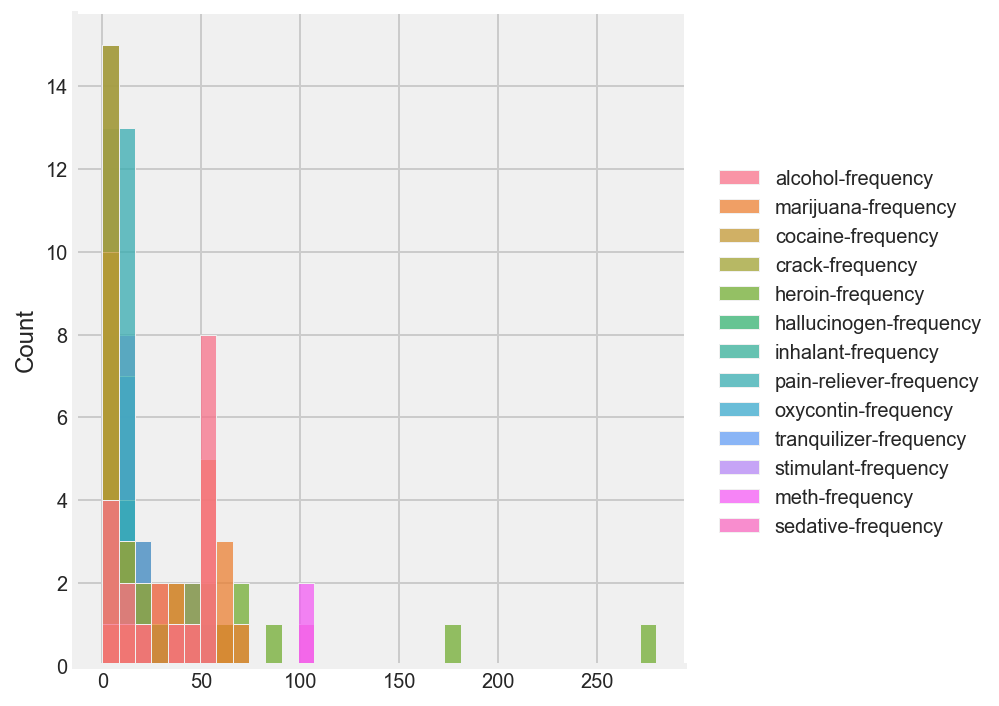

In [76]:
# all frequency on one overlapping histogram
sns.displot(drug_df[drug_freq]);
# frequency is grouped < ~75 days for median use per age group
# outliers are obvious for for heroin-frequency & meth-frequency

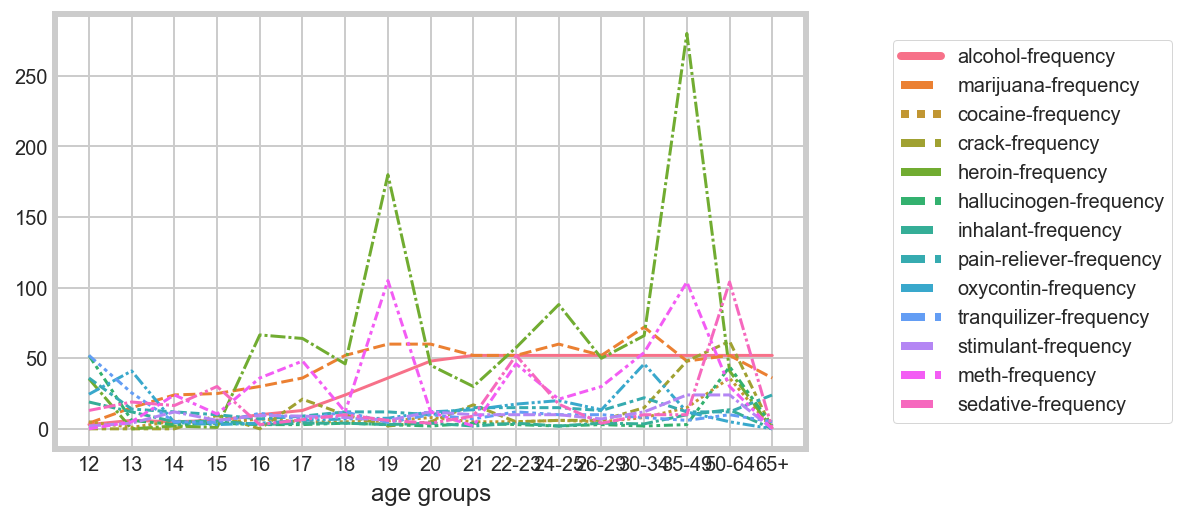

In [77]:
# all frequency across age groups
with sns.axes_style('whitegrid'):
    g = sns.lineplot(data=age_freq, linewidth=1.5)

    # Put a legend to the right side
    g.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), ncol=1)
    g.set_xlabel('age groups')
    plt.show()

### <span style="color:purple"> _Observations on heatmaps, covariance & other visuals_</span>  

**Heatmaps of age/use and age/frequency**  
- Age/use: alcohol & marijuana use is high across many age groups
- Age/freq: some bright points across the age groups - heroin potential outliers visible
    - trends again show for alcohol & marijuana  

**Drug-use and drug-freq across the Age brackets**  
- Across age brackets, alcohol & marijuana are the highest & most consistent for _use_ and _frequency_
- Heroin has some high peaks for frequency, but the use per age group is below 1.5% per age group.
- The are many interesting potential trends across the other drugs, but I'm narrowing in on alcohol & marijuana for closer investigation. 

**Individual histograms of drug-use, drug-frequency**  
- Use: alcohol & marijuana are the only two with use over 30% of the sample.
- Frequency: really shows the breaks & groupings within each drug-frequency.

**Histograms & Lineplots of all-drug-use, all-drug-frequency**  
- Use histogram: usage is grouped < ~15% of total. 
    - Except alcohol use which has a wide spread.
- Use lineplot: alcohol & marijuana are the clear trends across all age groups.
- Frequency histogram: frequency is grouped < ~75 days for median use per age group.
    - Outliers are obvious for for heroin-frequency & meth-frequency
- Frequency lineplot: 
    - Heroin is again showing sharp peaks
    - Alcohol & marijuana appear relatively consistent for age groups >= 20
 

### <span style="color:purple"> _Potentials for further/closer investigation_</span>  

**Potentials**  
- alcohol 
- marijuana
- cocaine -- grouped < 10 freq
- hallucinogen -- grouped < 10 freq
- tranq -- grouped < 10 freq
- those heroin peaks and potential outliers
 
**Decision:** limit further investigation to alcohol & marijuana

---
### <span style="color:purple"> _Investigate alcohol & marijuana in more detail_</span>  



In [78]:
drug_subset = drug_df[['alcohol-use', 'alcohol-frequency', 
                          'marijuana-use', 'marijuana-frequency']]
drug_subset.corr()

,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency
alcohol-use,1.000000,0.897889,0.594165,0.920425
alcohol-frequency,0.897889,1.000000,0.260219,0.818769
marijuana-use,0.594165,0.260219,1.000000,0.615610
marijuana-frequency,0.920425,0.818769,0.615610,1.000000


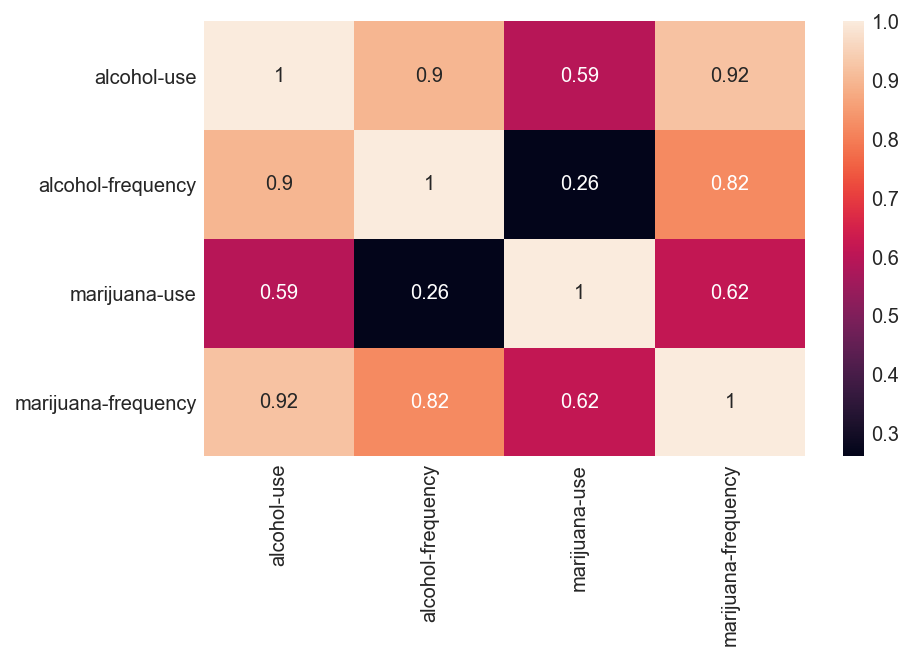

In [79]:
# heatmap
sns.heatmap(data=drug_subset.corr(), annot=True);

# alcohol use/freq
# frequency alcohol/marijuana

# marijuana use/freq
# use alcohol/marijuana

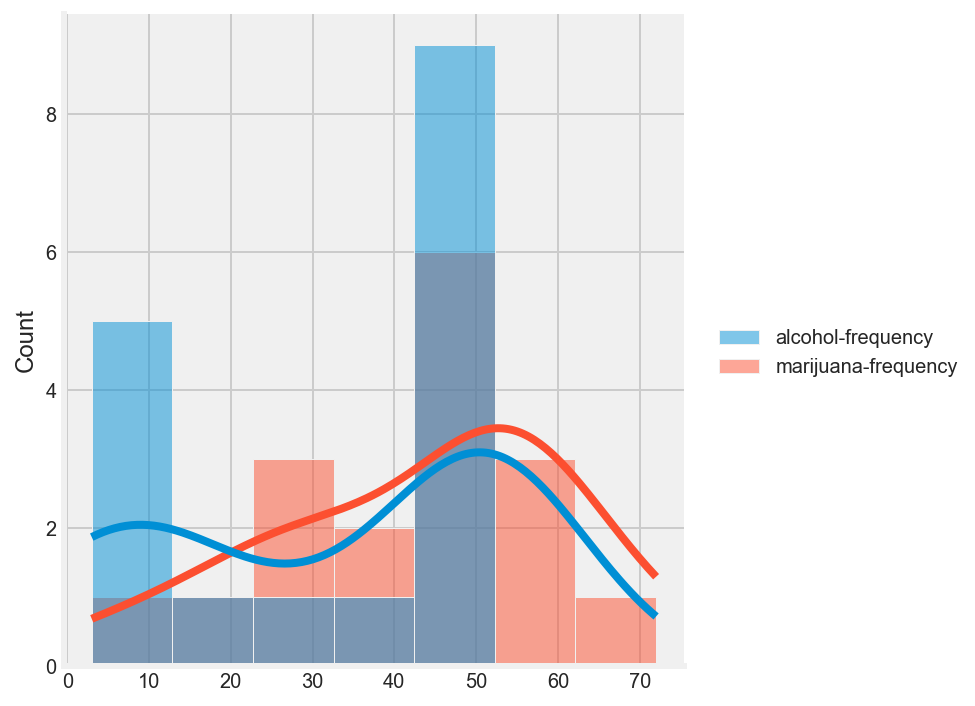

In [80]:
# histogram & kde distribution - frequency alcohol & marijuana
sns.displot(data=drug_df[['alcohol-frequency','marijuana-frequency']], kde=True);

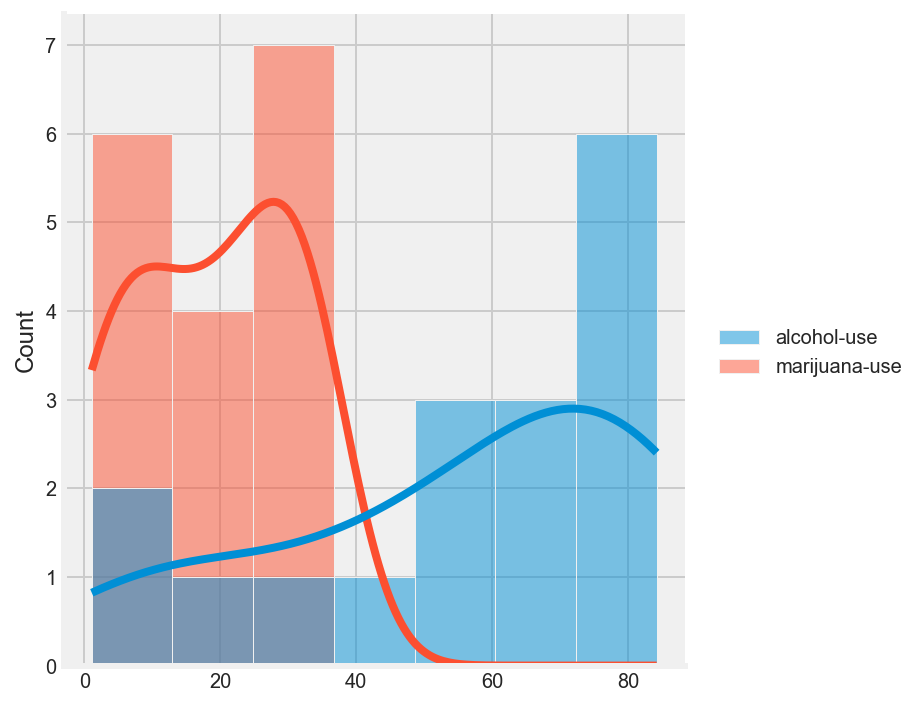

In [81]:
# # histogram & kde distribution - frequency alcohol & marijuana
sns.displot(data=drug_df[['alcohol-use','marijuana-use']], kde=True);

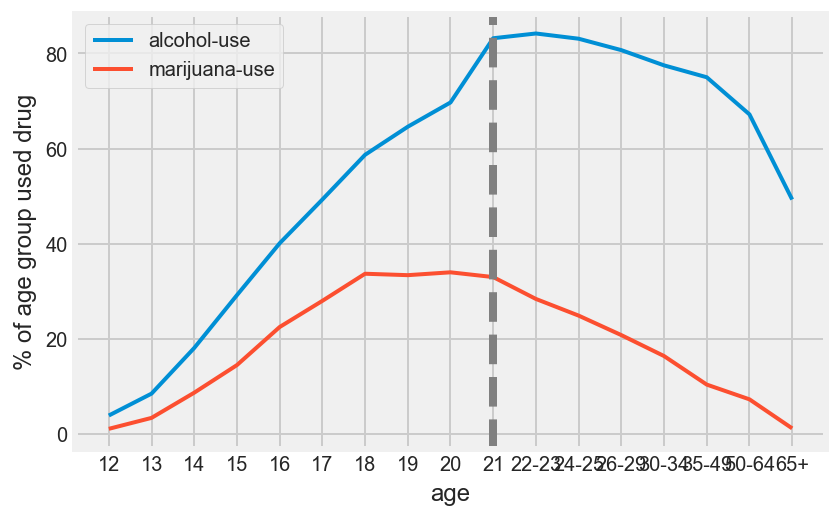

In [82]:
# lineplot - use of alcohol & marijuana 
g=sns.lineplot(data=drug_df, x="age", y='alcohol-use', linewidth=2)
sns.lineplot(data=drug_df, x="age", y='marijuana-use', linewidth=2)

g.legend(loc=0, labels=['alcohol-use', 'marijuana-use'])
g.set_ylabel('% of age group used drug')
g.axvline('21', color='grey', ls='--')
plt.show()

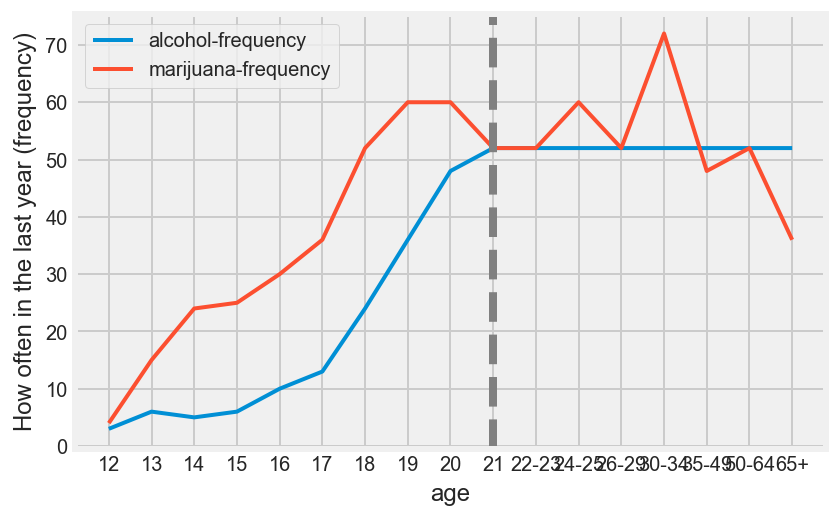

In [83]:
# lineplot - frequency alcohol & marijuana 
g=sns.lineplot(data=drug_df, x="age", y='alcohol-frequency', linewidth=2)
sns.lineplot(data=drug_df, x="age", y='marijuana-frequency', linewidth=2)

g.legend(loc=0, labels=['alcohol-frequency', 'marijuana-frequency'])
g.set_ylabel('How often in the last year (frequency)')
g.axvline('21', color='grey', ls='--')
plt.show()

### <span style="color:purple"> _Observations on alcohol & marijuana_</span>  

**Correlation**  
Group one  
- 0.9 alcohol - use/freq
- 0.82 frequency - alcohol/marijuana

Group two  
- 0.62 marijuana - use/freq
- 0.59 use - alcohol/marijuana

**Histogram with kde**  
- frequency - alcohol/marijuana : significant overlap, but alcohol higher peaks
- use - alcohol/marijuana : significant overlaps, but marijuana peaks at lower usage & alcohol peaks at higher usage.

**Lineplot with kde**  
- Use alcohol/marijuana : trend lines track similarly
- Frequency alcohol/marijuana : trend is similar under age 20, but then both (mostly) plateau  

---
**Time to pause investigations & move to hypothesis testing. Overview of dataset has highlighted many potential threads for investigation at another time.**  
- Correlations of alcohol/marijuana/use/freq & age
- Heroin & Meth use/freq - low use rate but extreme freq values which seem unlikely with the sample size.
- Perhaps check back to source data to find why there were fariables where usage=0.0 with freq>0:
    - crack-frequency
    - heroin-frequency
    - stimulant-frequency
    - sedative-frequency
- Grouping of similar overall frequencies - Pain-reliever, Oxycontin, Tranquilizer, Sedative, Stimulant

---
### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

### <span style="color:purple"> _Hypothesis Testing_</span>  

As I am still new to hypothesis testing, I've chosen a couple which are already evident from my exploration of the data. This is to help me gain understanding.


**Hypothesis 1**  
H0 : No correlation between alcohol-use and alcohol-frequency.  
H1 : Use and frequency are correlated for alcohol

Conclusion:  
p-value is so low, H0 must go & is rejected with 99% confidence.

In [84]:
# Pearsons Correlation Coefficient
# Tests whether two samples have a linear relationship
# H0: the two samples are independent.
# H1: there is a dependency between the samples.

result = stats.pearsonr(drug_df['alcohol-use'], drug_df['alcohol-frequency'])

print('Pearson correlation coef:', round(result[0],3))
print('P-value:', result[1])

Pearson correlation coef: 0.898
P-value: 1.0058747596848825e-06


In [85]:
# try ttest_rel which is meant to give a similar result to Pearsons 

result = stats.ttest_rel(drug_df['alcohol-use'], drug_df['alcohol-frequency'])
result


Ttest_relResult(statistic=7.483659077384618, pvalue=1.3033212453075805e-06)

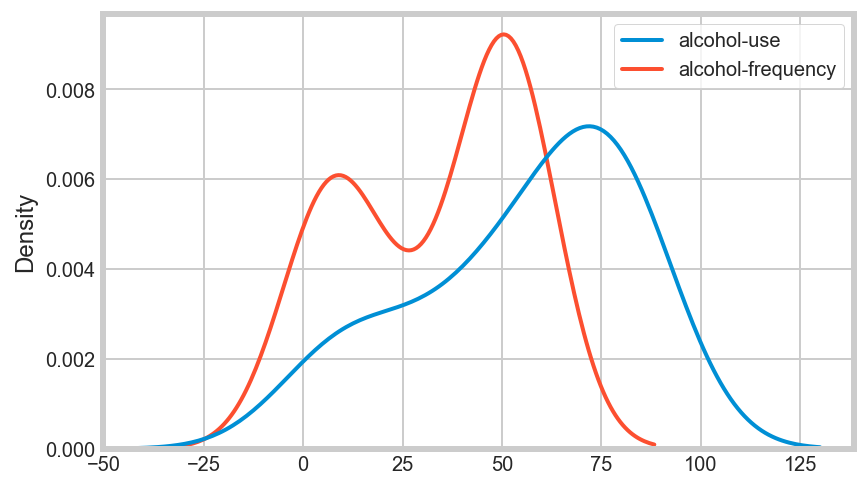

In [86]:
# plot the distribution of alcohol-use and alcohol-frequency
with sns.axes_style('whitegrid'):
    sns.kdeplot(data=drug_df[['alcohol-use','alcohol-frequency']], linewidth=2);

**Hypothesis 2**  
H0 : No correlation between alcohol-use and marijuana-use.  
H1 : Alcohol-use and marijuana-use are correlated.

Conclusion:  
p-value is above 0.01, so cannot reject H0 with 99% confidence.  
However, p-value is below 0.05, so H0 can be rejected with 95% confidence.

In [87]:
result = stats.pearsonr(drug_df['alcohol-use'], drug_df['marijuana-use'])

print('Pearson correlation coef:', round(result[0],3))
print('P-value:', round(result[1],3))

Pearson correlation coef: 0.594
P-value: 0.012


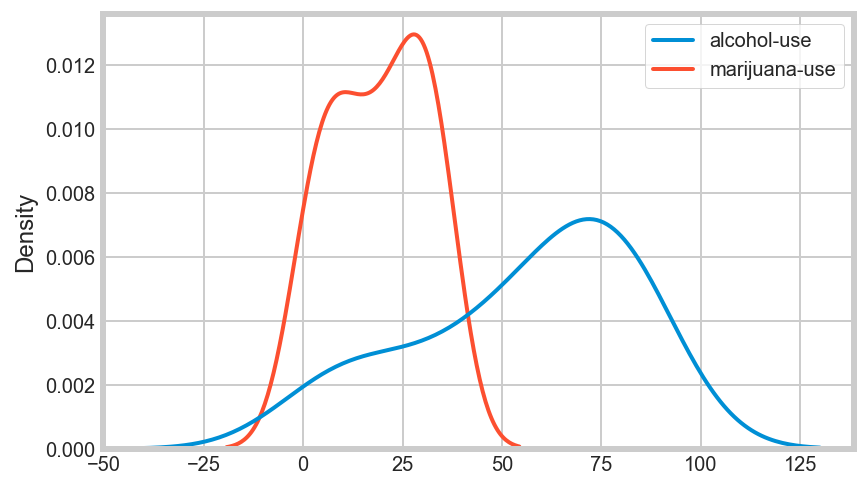

In [88]:
# plot the distribution of alcohol-use and marijuana-use
with sns.axes_style('whitegrid'):
    sns.kdeplot(data=drug_df[['alcohol-use','marijuana-use']], linewidth=2);

**Report**



...

#### <span style="color:purple"> _Hypothesis Results_</span>  


**Results** 
- Alcohol use and frequency are correlated (99% confidence)
- Alcohol use and Marijuana use are correlated (95% confidence)


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [89]:
sat_rate = sat_scores_df['Rate']
sat_rate.describe()

count    51.000000
mean     37.000000
std      27.550681
min       4.000000
25%       9.000000
50%      33.000000
75%      64.000000
max      82.000000
Name: Rate, dtype: float64

### <span style="color:purple"> _Thoughts about outliers_</span>  


**There are many ways to identify outliers.**  
When analysing data, you gain knowledge of the variables of your dataset and what they represent.  

One of these aspects is knowing what values are typical, unusual, and impossible. 

For the _rate_ variable, none of the values are impossible, although there are a few that are unusual. It has no values commonly called outliers by the general forumla for skewed data:  
- Outliers are more than 1.5 * IQR away from the respective quartile, Q1 or Q3.*

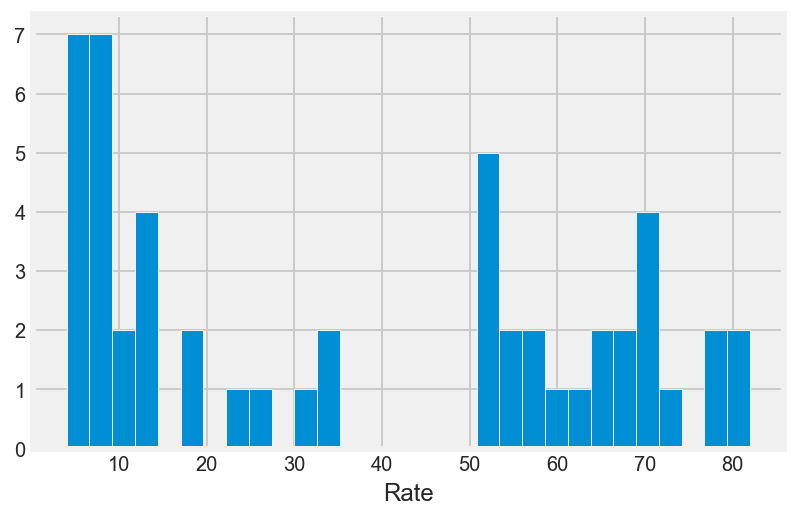

In [90]:
# To look for outliers, increase the number of bins in histogram
# to see if there is another grouping beyond the two major groups.

sat_rate.hist(bins=30)

plt.xlabel('Rate')
plt.show()

median 33.0
mode 0    4
1    8
2    9
dtype: int64


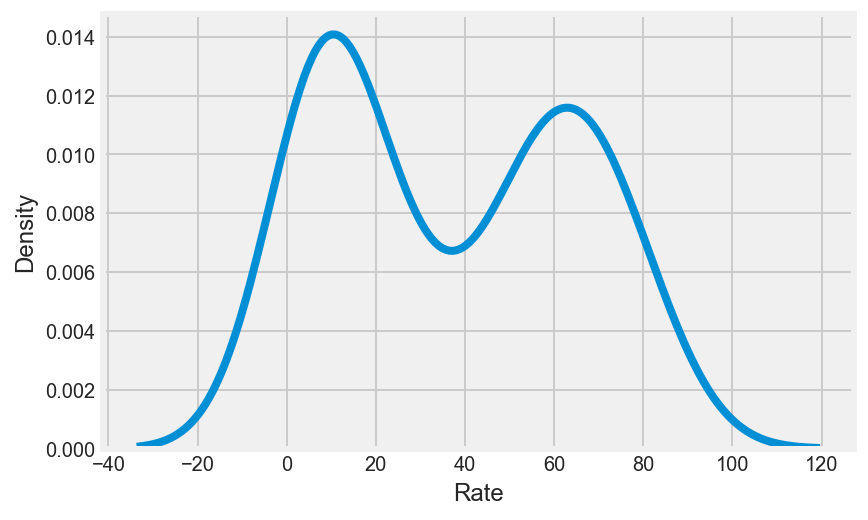

In [91]:
sns.kdeplot(sat_rate)

print('median', sat_rate.median())
print('mode', sat_rate.mode())

In [92]:
# Lowest Quartile: how many observations & what is it's range 

print('count of lowest band:', sat_rate[sat_rate < 9].count())
print('range of lowest band:', (8-4))
sat_rate[sat_rate < 9].value_counts()

count of lowest band: 11
range of lowest band: 4


4    3
8    3
5    2
6    2
7    1
Name: Rate, dtype: int64

In [93]:
# Highest Quartile: how many observations & what is it's range 

print('count of highest band:', sat_rate[sat_rate >64].count())
print('range of highest band:', (82-65))
sat_rate[sat_rate > 64].value_counts().sort_index()

count of highest band: 13
range of highest band: 17


65    2
67    1
68    1
69    2
71    2
72    1
77    1
79    1
81    1
82    1
Name: Rate, dtype: int64

In [94]:
# what does the Rate.describe() statistics look like if you
# exclude top 4 results
sat_rate_alt = sat_rate[sat_rate < 75]
sat_rate_alt.describe()

count    47.000000
mean     33.361702
std      25.539761
min       4.000000
25%       9.000000
50%      26.000000
75%      56.500000
max      72.000000
Name: Rate, dtype: float64

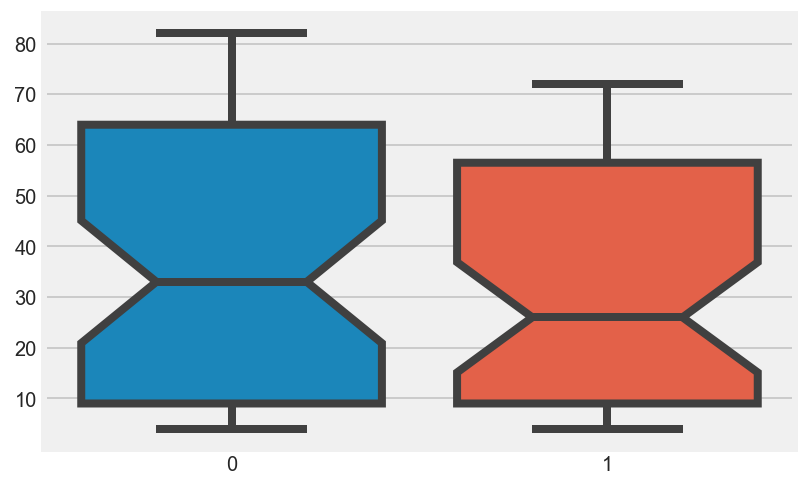

In [95]:
# tried a boxplot comparision, but didn't find it appealing

sns.boxplot(data=[sat_rate, sat_rate_alt], notch=True);

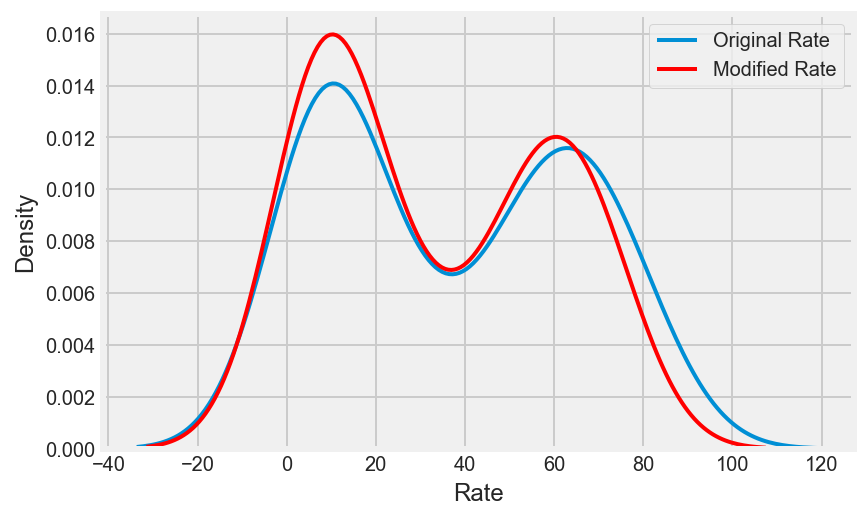

In [96]:
# graphing both distribution curves together gives a nice view 
# of how the modified range keeps the characteristic 2 peaks
# while narrowing the top of the range.

g=sns.kdeplot(sat_rate, x='Rate', linewidth=2)
sns.kdeplot(sat_rate_alt, linewidth=2,color='r');

g.legend(loc=0, labels=['Original Rate', 'Modified Rate'])
plt.show()

In [97]:
print("** original Rate stats **")
print(sat_rate.describe().iloc[[1,5,2]])
print('-------------------------')
print("** modified Rate stats **")
print(sat_rate_alt.describe().iloc[[1,5,2]])

** original Rate stats **
mean    37.000000
50%     33.000000
std     27.550681
Name: Rate, dtype: float64
-------------------------
** modified Rate stats **
mean    33.361702
50%     26.000000
std     25.539761
Name: Rate, dtype: float64


In [98]:
# which states would be excluded from the dataset 
# if these Rate observations were excluded

sat_scores_df[sat_scores_df['Rate']>75]

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10


### <span style="color:purple"> _Thoughts about excluding top group of values from Rate_</span>  

The modified data now has a narrower standard deviation and the mean of the modified data is now at the median of the original data.

The distribution graph has narrowed slightly but continues to have the same shape as the original.

**Conclusion**  
I would prefer to use the original rate data.